 # Detecting the Credit Card Fraud
This project is about analysing a credit card fraud dataset to draw importance in the variables and predict the future credit card fraud. Before formally analysing, it is crucial to understand the followings.
 ## Variables
The whole dataset contains 31 variables. One of them is the dependent variable, which is **Class**. This variable is binary, which means it only take the values of 0 or 1, where 1 represents a fraud and 0 represents a nonfraud. Other 30 variables are independent variables, which contain **Time**, **Amount**, and **V1** to **V28**. The feature **Time** contains the seconds elapsed between transaction and the first transaction in the dataset. The feature **Amount** represents the transaction amount. Although **Time** and **Amount** should be continuous variables theoretically, they are discrete in the dataset. The variable **Time** has unit of 0.1 seconds and the variable **Amount** has unit of 0.01. The continuous variables **V1** to **V28** repesent other features for a typical transaction, but the names are not shown because of confidential reasons.  
 ## Imbalanced Dataset
We should note that this dataset is highly imbalanced. The dependent variable **Class** has much more values of 0s than 1s. In other word, the dataset contains much more instances of nonfraud than instances of fraud. Imbalanced dataset is problematic because when we perform regression or classification models, the models will be inefficient (or inaccurate) in predicting the coefficients of the variables. We will discuss this later in our analysis.
 ## Logistic Regression
Logistic regression is a desire candidate for analysing problems with binary dependent variables. The reason that multiple linear regression is not a good choice in analysing data with binary dependent variables is that the predicted value represents the probability of the dependant variable of an instance being 1. Mathematically, 
$$y(\textbf{x}, \theta) = Pr(Y = 1 | \textbf{x}, \theta)$$
where $y(\textbf{x}, \theta)$ is the regression function, $\textbf{x}$ represents the variables in a certain instance, and $\theta$ is the predicted coefficients of independent variables. In multiple linear regression, the regression can take values that are less than zero or larger than one. The result therefore disobeys the axioms of probability. 

However, the logistic regression does not have such a problem. The regression function of a logistic regression can be represented as follow:
$$y(\textbf{x}, \boldsymbol{\theta}) = \frac{1}{1+e^{- \textbf{x} \cdot \boldsymbol{\theta}}}$$
where $\textbf{x}$ is the vector $(1, x_1, x_2, ..., x_n)$ and $\boldsymbol{\theta}$ is the vector $(\theta_0, \theta_1, ..., \theta_n)$. We can notice easily that if $\boldsymbol{\theta}$ is non-zero and bound, the regression function tends to 0 when $\textbf{x}$ tends to $-\infty$ and the regression function tends to 1 when $\textbf{x}$ tends to $\infty$. This property of the logistic function makes it reasonable for predicting a dataset with binary dependent variable. We therefore aim to find the the vector of coefficients $\boldsymbol{\theta}$ as accuratly as possible. 
 ## Decision Tree Classifier
 Decision tree classifier (DTC) is a supervised machine learning algorithm that assigns data points into categories, which, in our case, there are two categories, fraud and nonfraud. The DTC works by iteratively seperating the dataset into sub-datasets based on the values of selected features. The first feature selected creates the root node. The end points, where no iterations can be performed anymore, are called the leaf nodes. The decision of breaking the iteration depends on several varaibles, such as maximum tree depth, minimum samples per leaf, and minimum impurity decrease. We will discuss this in detail in the later sections. Decision tree can be visualised and, therefore, it is easy for one to understand the decision process. It is also powerful since it can capture complex relationship in data. However, it can be prone to overfitting, which is a major challenge in performing a DTC. This issue need to prevented by limiting the tree depth and putting a threshold on the samples in the leaf nodes.

# Basic Information of the Dataset
We first import the packages we will be using. Package pandas is for manipulating dataset, packages numpy, math, and scipy are for mathematics and statistics, packages matplotlib and seaborn are for plotting and visualisation, and package sklean is for machine learning algorithms.

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from scipy.stats import norm

We import the data file.

In [3]:
df = pd.read_csv('creditcard.csv')

## Variable Distribution
We visualize the dataset by displaying the first 5 rows. All these 5 instances belong to the category of nonfraud.

In [4]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

We display the variables of our dataset. The variables are **Time**, **Amount**, **V1** to **V28**, and **Class**.

In [5]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


We can then show the basic information, such as the mean, standard deviation, and percentiles of all the variables. The mean and standard deviation of variables **Time** and **Amount** are much larger than the variables **V1** to **V28**. By looking at the information in **Class**, we see that the dataset contains total 284807 instances and only 0.1727% of them are fraud instances. We therefore have an idea of how imbalanced our dataset is.

In [6]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

We then check if there is null in the dataset. fortunately, there is no null data point in the dataset.

In [7]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


We plot the histgrams for all the variables to get further insights about them. Most of the variables are skewed or have an arbitrary distribution 'shape' rather than normal distribution. 

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4218/3513902229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4218/3513902229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/mp/yc2_4qzn1nbg

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4218/3513902229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4218/3513902229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/mp/yc2_4qzn1nbg

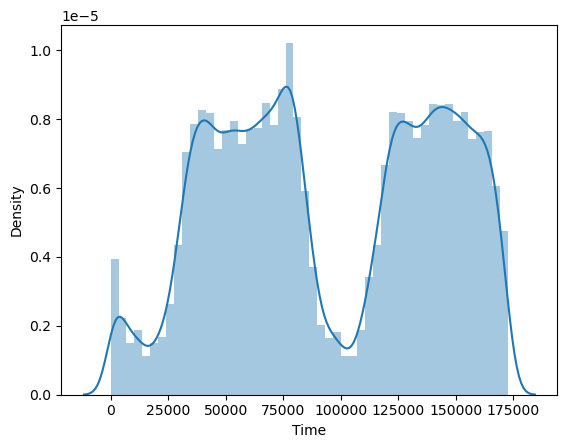

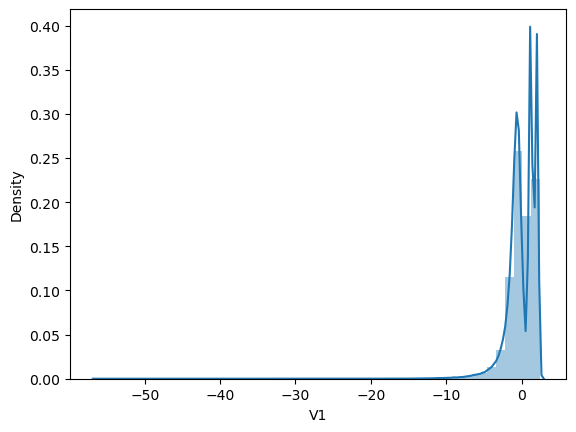

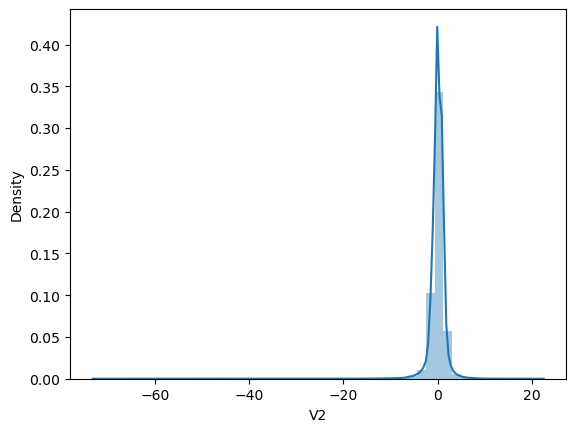

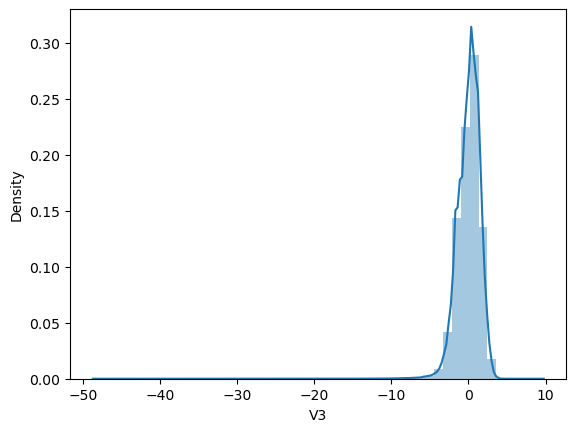

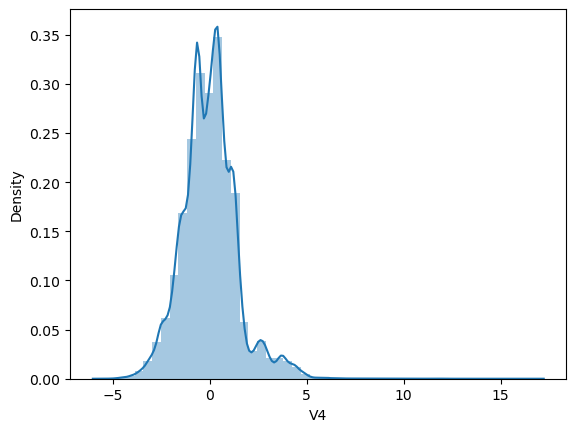

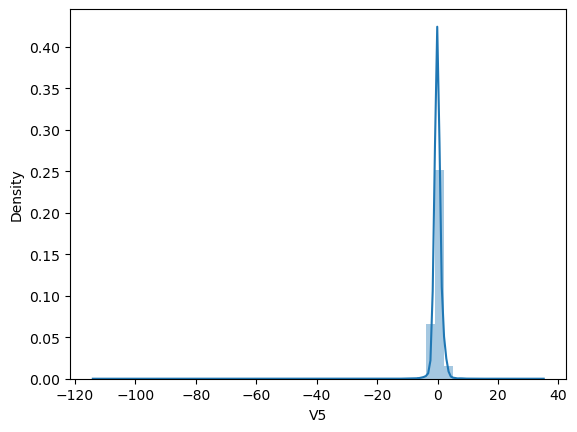

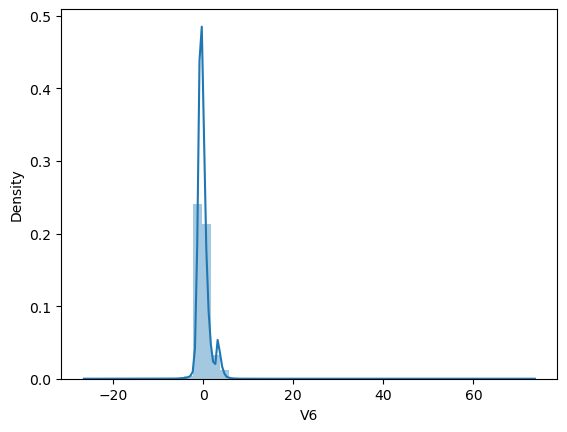

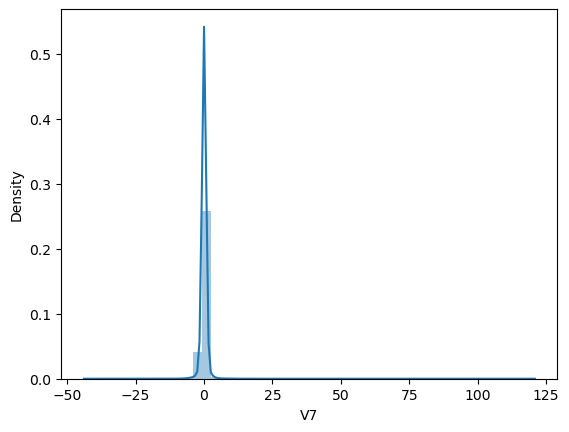

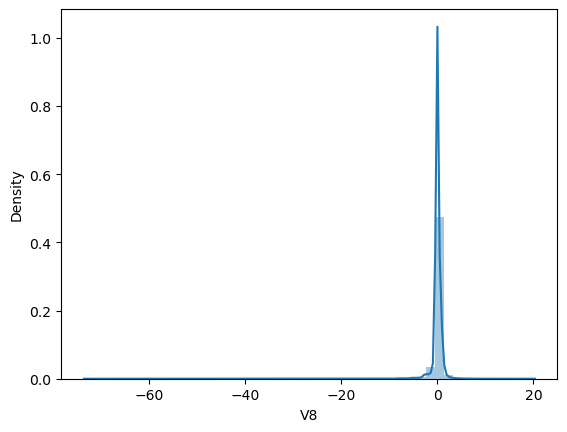

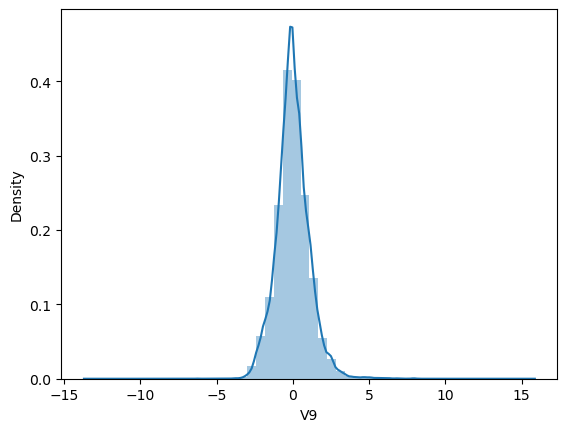

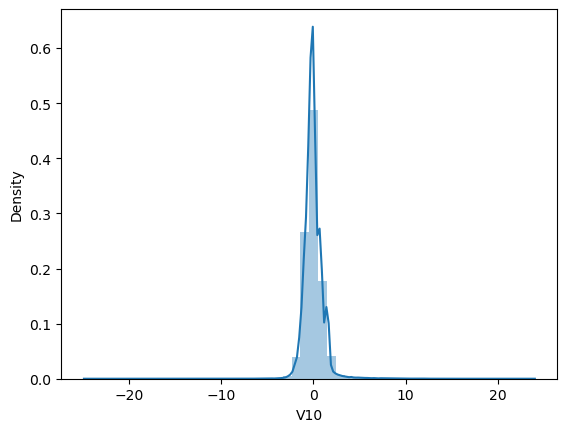

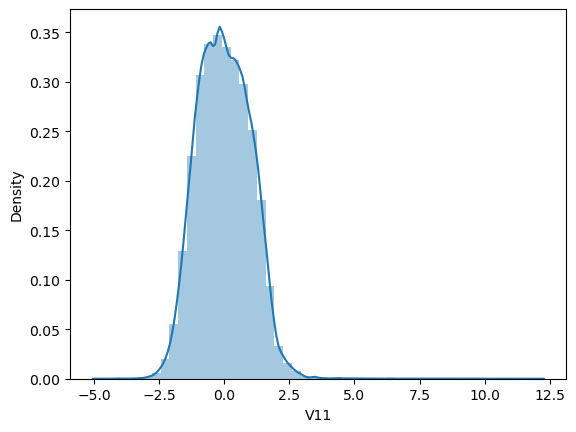

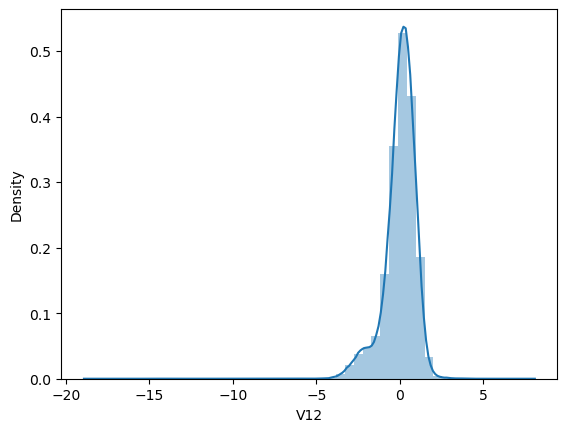

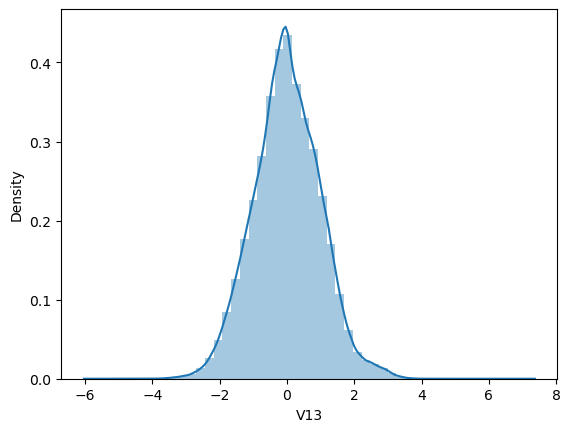

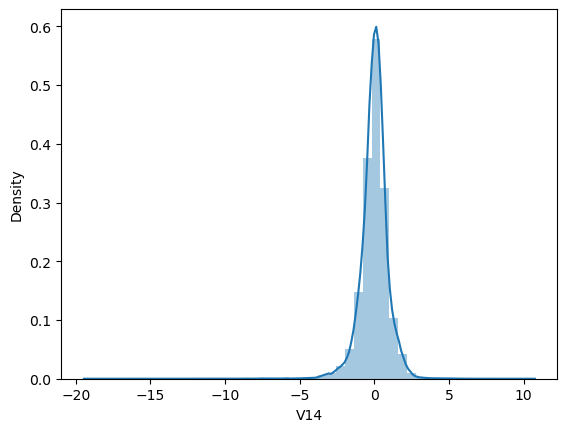

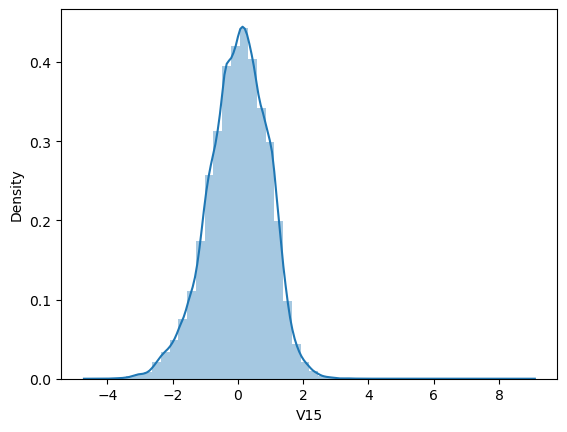

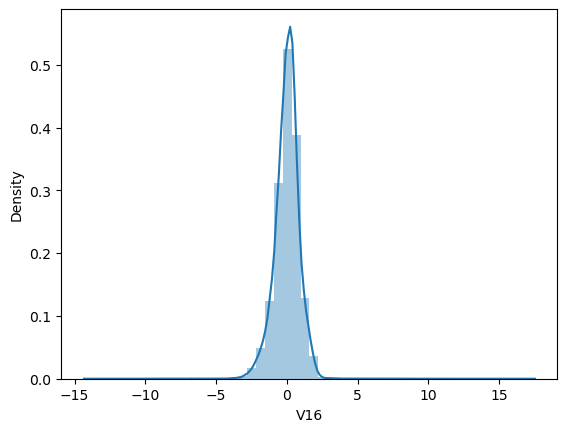

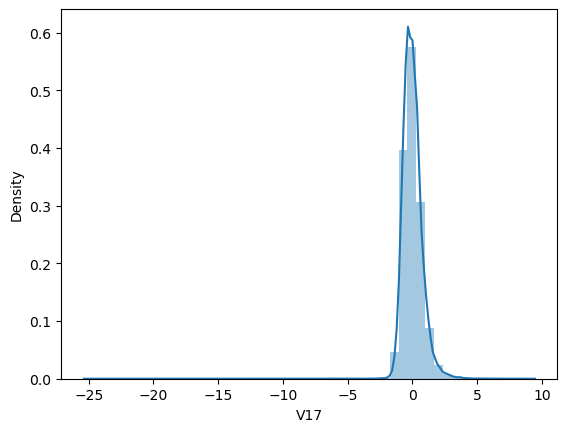

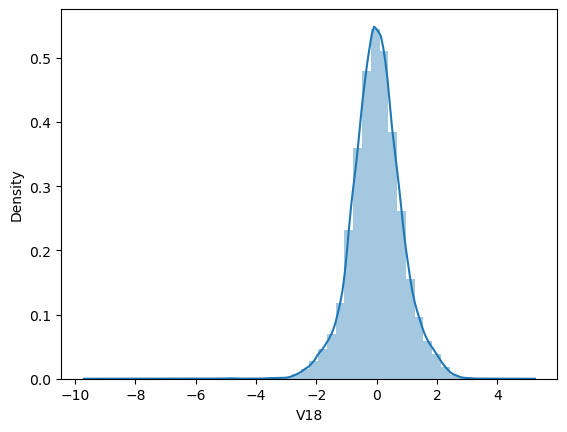

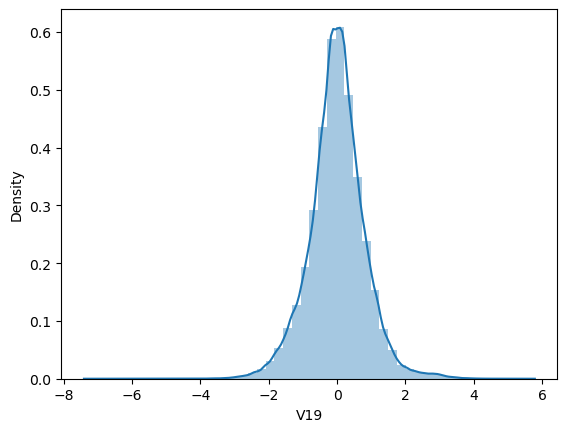

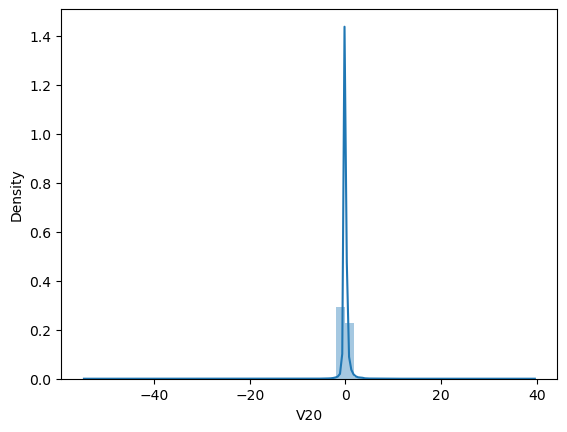

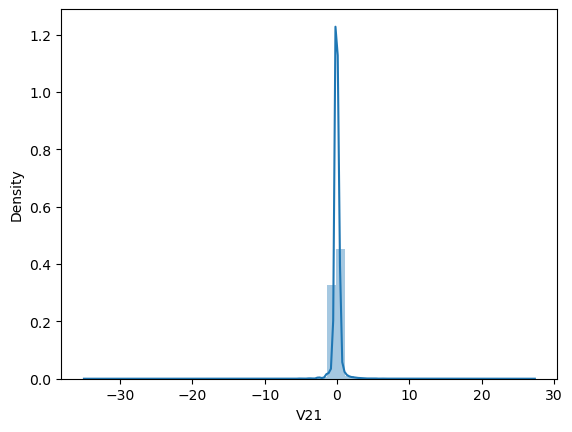

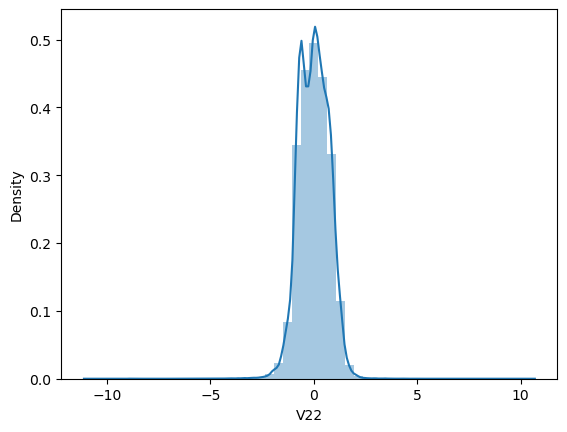

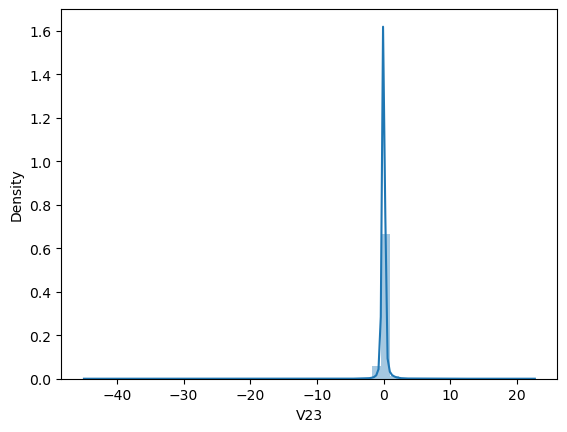

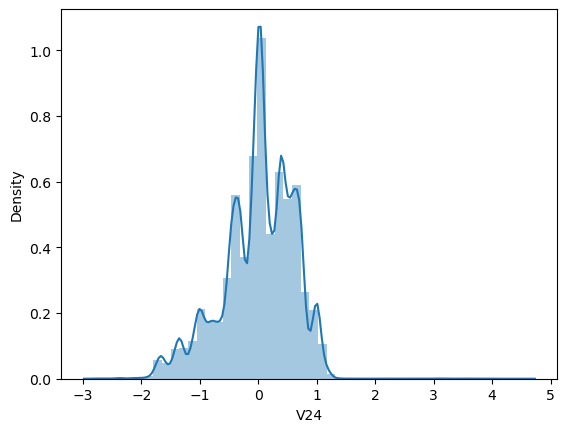

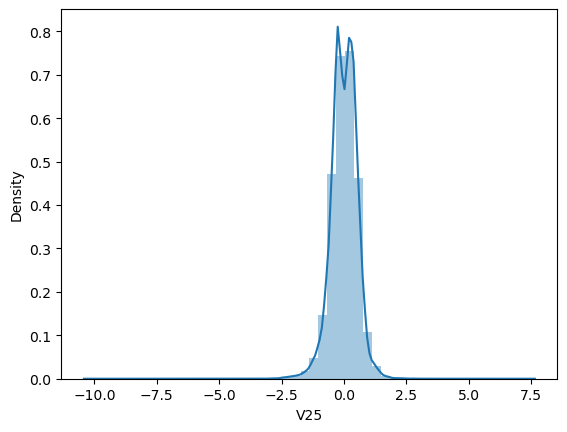

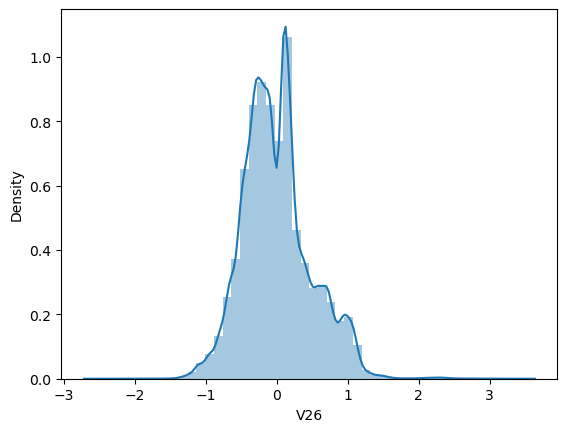

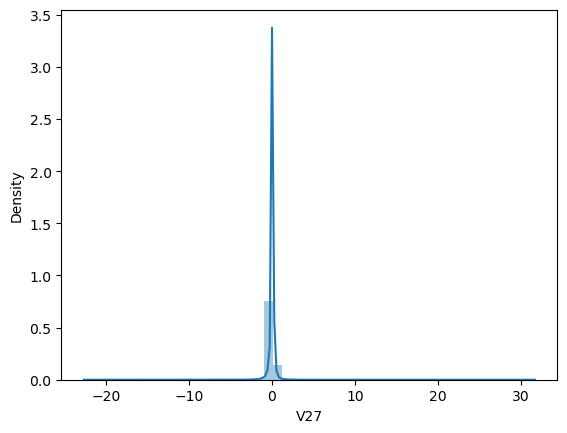

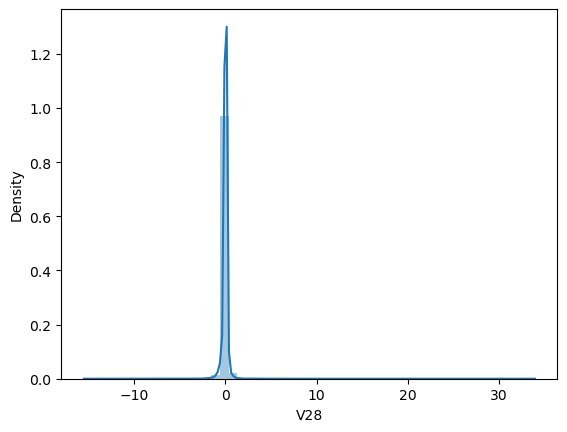

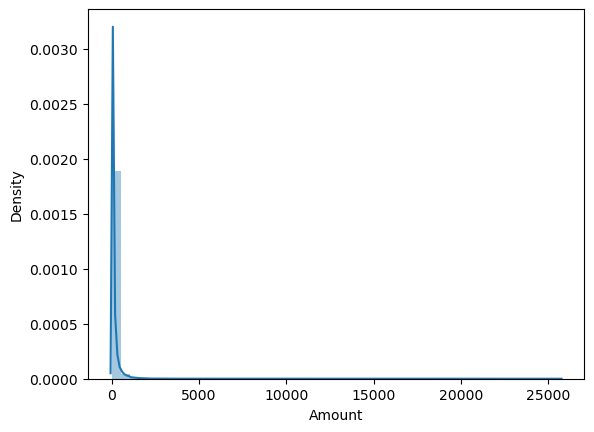

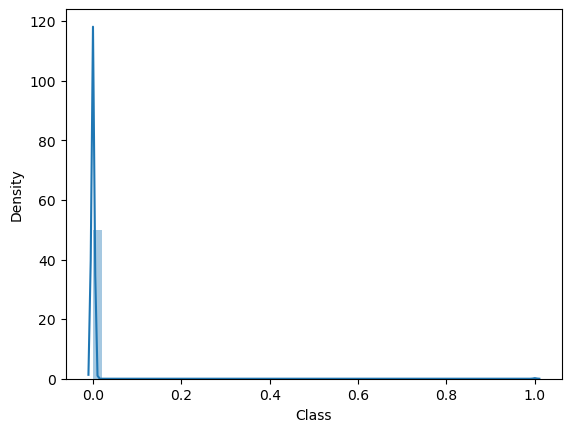

<Figure size 640x480 with 0 Axes>

In [8]:
for i in df.columns:
    sns.distplot(df[i])
    fig = plt.figure()

We see if the skewness can be removed from the variable **Amount** by taking a log on amount. However, this distribution is still unclear.

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4218/266639815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Amount'].replace(0,0.01)))


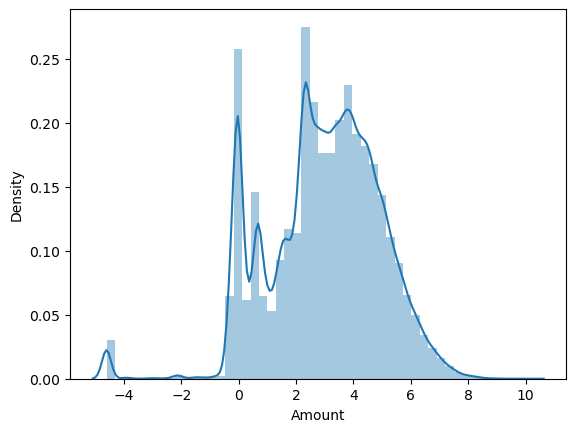

<Figure size 640x480 with 0 Axes>

In [9]:
sns.distplot(np.log(df['Amount'].replace(0,0.01)))
fig = plt.figure()

We can display the proportion of 0s in each of the variables. The propotion of 0s in **Class** is 99.8273%, which represents that 99.8273% of the instances are nonfraud. We can also see that there are 0.0007% instances that have time 0 and there are 0.6408% instances that have 0 transaction amount.

In [10]:
count = len(df['Class'])
print(df[df == 0].count(axis = 0)/count)

Time      0.000007
V1        0.000000
V2        0.000000
V3        0.000000
V4        0.000000
V5        0.000000
V6        0.000000
V7        0.000000
V8        0.000000
V9        0.000000
V10       0.000000
V11       0.000000
V12       0.000000
V13       0.000000
V14       0.000000
V15       0.000000
V16       0.000000
V17       0.000000
V18       0.000000
V19       0.000000
V20       0.000000
V21       0.000000
V22       0.000000
V23       0.000000
V24       0.000000
V25       0.000000
V26       0.000000
V27       0.000000
V28       0.000000
Amount    0.006408
Class     0.998273
dtype: float64


We plot the scatter plots among three variables **Time**, **Amount**, and **Class** and try to find if there are any obvious relations among them. We then discover that no fraud has been dicsovered when transaction amount larger than 5000. From the plots, we did not find any explicity relationship between **Time** and **Class** or between **Time** and **Amount**.

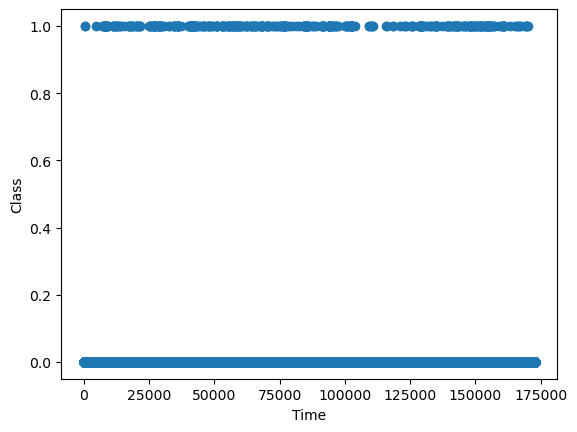

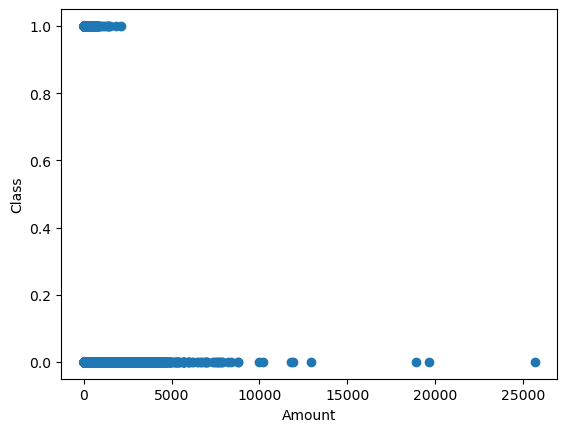

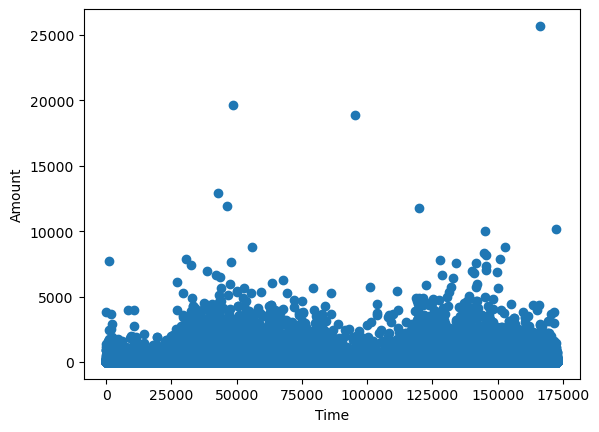

In [11]:
Time = df['Time'].tolist()
Amount = df['Amount'].tolist()
Class = df['Class'].tolist()

plt.scatter(Time, Class)
plt.xlabel('Time')
plt.ylabel('Class')
plt.show()
plt.scatter(Amount, Class)
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()
plt.scatter(Time, Amount)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

## Correlation Matrix
We then display the correlation matrix between variables. The correlation matrix is a matrix that displays the correlation ($corr(X, Y) = \frac{Cov(X, Y)}{\sqrt{Var(X)Var(Y)}}$) of each every combination of two variables. It is symmetric, obviously, and its elements range from -1 to 1. The diagonal elements of the matrix are always 1, as the correlation of a variable with its self is always 1. The absolute value of the correlation tells us how related the two variables are. High absolute value of the correlation may cause multilinearity issue in performing regression. 

The following is the correlation matrix heatmap for our dataset. We can see that most of the variables are unrelated and the correlation matrix is inefficient to find relations between variables. This is because the dataset is highly imbalanced. The instances of nonfraud dominate the instances of fraud. Therefore, imagine that if we create a random synthesised instance, where variables are independently chosen, it will highly likely be a nonfraud instance. This is exactly the reason that the correlations between variables are close to 0, as the dataset contains most datapoints where variables are independently chosen.

<Axes: >

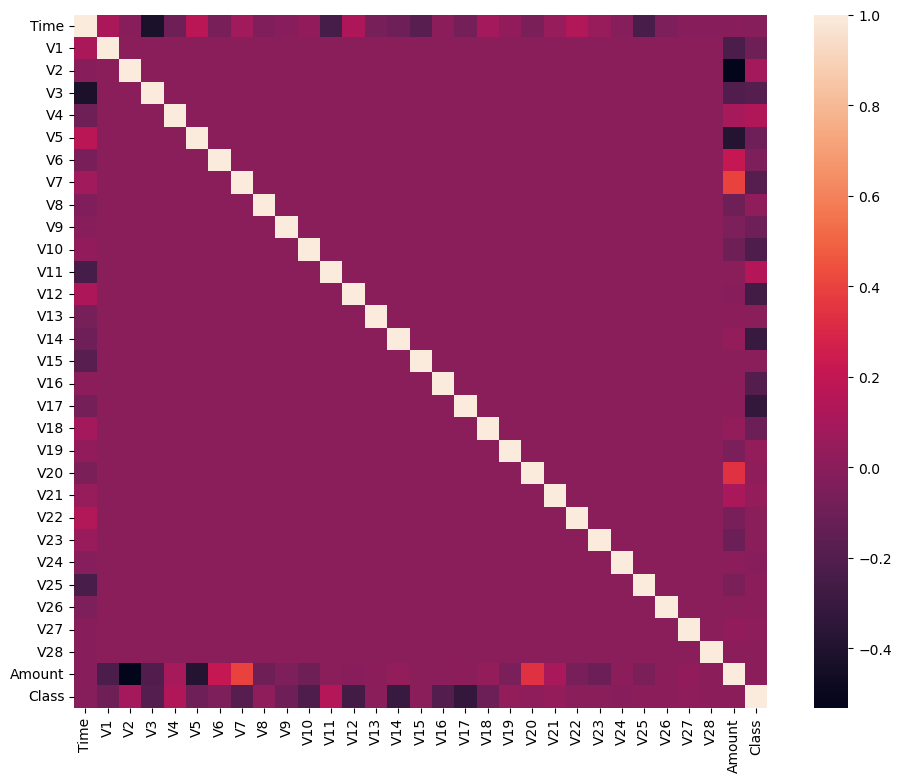

In [12]:
correlation_matrix = df.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(correlation_matrix, square = True)

# Rescale the Dataset
As we have seen before, the mean, variance, and quartiles show large difference among variables. It is essential to rescale the dataset. The reasons for rescaling are the followings:
- **Improved model performance** Rescaling variables can improve model's efficiency. 
- **Interpretability** The relative importance among variables can only be compared after rescaling.
- **Regularization** Many regularization algorithms, such as l1 and l2 regularization, which we will discuss in detail when we perform logistic regression, require the variables to be scaled.

The reason that Standard Scaler is not a good choice is that most of the variables are not normal and contain outliers. Therefore, we choose the Robust Scaler, which is suitable to deal with the variables that are not normally distributed and contain outliers.

We first create a list of indices, which will be the new variables in the rescaled dataframe.

In [13]:
from sklearn.preprocessing import RobustScaler

In [14]:
stradd = 'Scaled_'
new_df_columns = []
for i in df.columns[:-1]:
    new_index = stradd + i
    new_df_columns.append(new_index)
print(new_df_columns)

['Scaled_Time', 'Scaled_V1', 'Scaled_V2', 'Scaled_V3', 'Scaled_V4', 'Scaled_V5', 'Scaled_V6', 'Scaled_V7', 'Scaled_V8', 'Scaled_V9', 'Scaled_V10', 'Scaled_V11', 'Scaled_V12', 'Scaled_V13', 'Scaled_V14', 'Scaled_V15', 'Scaled_V16', 'Scaled_V17', 'Scaled_V18', 'Scaled_V19', 'Scaled_V20', 'Scaled_V21', 'Scaled_V22', 'Scaled_V23', 'Scaled_V24', 'Scaled_V25', 'Scaled_V26', 'Scaled_V27', 'Scaled_V28', 'Scaled_Amount']


We then perform the robust scaling to each independent variable in the dataset.

In [15]:
df1 = df[df.columns[:-1]]
Scaled_df = RobustScaler().fit_transform(df1.to_numpy())
Scaled_df = pd.DataFrame(Scaled_df, columns = new_df_columns)
Scaled_df['Class'] = Class
print(Scaled_df.head())

   Scaled_Time  Scaled_V1  Scaled_V2  Scaled_V3  Scaled_V4  Scaled_V5  \
0    -0.994983  -0.616237  -0.098602   1.228905   0.878152  -0.217859   
1    -0.994983   0.524929   0.143100  -0.006970   0.293974   0.087726   
2    -0.994972  -0.615587  -1.002407   0.830932   0.251024  -0.344345   
3    -0.994972  -0.440239  -0.178789   0.841250  -0.529808   0.033775   
4    -0.994960  -0.526089   0.579239   0.713861   0.265632  -0.270695   

   Scaled_V6  Scaled_V7  Scaled_V8  Scaled_V9  ...  Scaled_V21  Scaled_V22  \
0   0.631245   0.177406   0.142432   0.334787  ...    0.026866    0.253109   
1   0.164395  -0.105740   0.117064  -0.164482  ...   -0.473332   -0.602719   
2   1.778007   0.668164   0.420388  -1.179796  ...    0.668917    0.714254   
3   1.303832   0.175637   0.662489  -1.076888  ...   -0.190105   -0.001408   
4   0.317183   0.491625  -0.546463   0.700808  ...    0.048266    0.739092   

   Scaled_V23  Scaled_V24  Scaled_V25  Scaled_V26  Scaled_V27  Scaled_V28  \
0   -0.320791  

# Concepts of Binary Classification
After rescaling, we are at the stage of performing the logistic regression on the dataset. When performing such a regression model, it is essential to understand the following concepts.
## Predicted Outcomes for a Binany Classification Model
We classify the variable **Class** in two categories, 1 (Fraud) for Positive and 0 (Nonfraud) for Negative. Since we are dealing with a dataset which has binary dependent variable, there are four possible outcomes when we predict an instance using a binary classification model. They are the followings:
- **True Positives (TP)** A true positive occurs when the model correctly predicts a positive instance as positive.
- **False Positives (FP)** A false positive occurs when the model incorrectly predicts a negative instance as positive.
- **True Negatives (TN)** A true negative occurs when the model correctly predicts a negative instance as negative.
- **False Negatives (FN)** A false negative occurs when the model incorrectly predicts a positive instance as negative.

If a model is efficient, we expect the numbers of **TP** and **TN** to be high and the numbers of **FP** and **FN** to be low. A purely random classifier will have roughly the same numbers in all four outcomes.
## TPR, FPR, and Precision
There are four concepts that are widely used in analysing the binary classification model. True Positive rate (TPR), also know as Recall, represents the ratio of **TP** to the actual total positives. It shows of all actual positive instances, the instances that the model correctly classified as positive. False Positive rate (TPR) represents the ratio of **FP** to the actual total negatives. It shows of all actual negative instances, the instances that the model incorrectly classified as positive. Mathematically, 
$$TPR = \frac{TP}{TP + FN}$$
$$FPR = \frac{FP}{FP + TN}$$
For an efficient model, we expect to see high TPR (close to 1) and low FPR (close to 0). For a purely random classifier, we expect that the TPR roughly equals the FPR.

Precision quantifies the proportion of true positive predictions out of all positive instances predicted by the model. Mathematically,
$$Precision = \frac{TP}{TP + FP}$$
For an efficient model, we expect to see high Precision (close to 1).
## Training Score
Before performing the logistic regression, we split our dataset into two sub-dataset. One is the training dataset, and the other is the test dataset. We train the logistic regression with the training dataset and test its performance and effeciency with the test dataset. We used the trained model to predict the outcomes using the independent variables in the test dataset and compare the outcomes with the actual dependent variable in the test dataset. The training score is the propotion of the corrected predictions out of all instances.
## Cross-Validation
Cross-validation is to understand the performance of the predicted model on unseen or new dataset rather than on the dataset we used to train the model. It ensures that the predictd model is robust. 

The procedure involves splitting the dataset into $k$ subsets, for example, $A_i$ where $i$ takes value from $1$ to $k$. It can be done by randomly choosing roughly equal number of elements in each subset or by choosing the elements that follow the similar distribution to the dataset in each subset. The latter is also known as stratified cross-validation. Once the dataset is properly splitted, the model is trained $k$ times, where the training set is given by the the union of $k-1$ subsets, given by $\cup_{i \neq j} A_i$, and the test set is remaining subset, $A_j$. By the end of each subset training procedure, a subset training score is calculated. The cross-validation score is the mean of $k$ subsets training scores. 

The cross-validation method evaluates on mutiple subsets of the original dataset, and, therefore, extract the information of the dataset efficiently. However, due to the iteration process and possibly large dataset and $k$ value, it may have a long run time. 
## Receiver Operating Characteristic
The Receiver Operating Characteristic (ROC) is graphical performance measurement tool widely used in the field of binary classification. The procedure involves firstly setting a number of classification thresholds. The model function, such as the logistic regression function, will return a number between 0 and 1 in predicting every datapoint rather than 0 or 1. When setting a classifation threshold (for example 0.5 by default), the model will assign the instances with function values larger than the threshold to the classification 1, and assign those with function values lower than the threshold to the classification 0. A higher threshold will cause more negatives but fewer positives. And a lower threshold will cause more positives and fewer negatives. We can easily see that by changing the threshold, the trade-off between TPR and FPR changes. Therefore, we can plot a graph of the trade-off between TPR and FPR at different classification thresholds. This is known as the ROC curve. For a purely random classifier, the TPR is roughly equal to the FPR as indicated in above sections. Therefore, the ROC curve is a straight line from $(0, 0)$ to $(1, 1)$. The area under the curve (AUC) is the ROC AUC score of the model. We can obviously notice that the ROC AUC score for a random classifier is 0.5.
## Precision Recall Curve
Similar to the ROC curve, the precision recall curve (PR curve) measures the relation between TPR (or Recall) and Precise while threshold changes. The area under the curve is the score for PR curve, We will discuss in detail in the following sections why PR curve is sensitive to imbalanced dataset.

# Logistic Regression on the Original Dataset
## Data Splitting
The first step is to seperate the dataset into training subset and test subset. The ratio of the training subset size to the test subset size is 4:1. We also count the fraud instances in the training subset and find its proportion is 0.1729%, which is close to the fraud propotion in the original dataset. This is good, because we don't want a biased training subset.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
XXX = Scaled_df.drop('Class', axis = 1)
YYY = Scaled_df['Class']

XXX_train, XXX_test, YYY_train, YYY_test = train_test_split(XXX, YYY, test_size = 0.2, random_state = 77)

df_train = pd.concat([XXX_train, YYY_train], axis = 1)
df_test = pd.concat([XXX_test, YYY_test], axis = 1)
print(df_train.head())
print(df_test.head())
print(YYY_train[YYY_train == 1].count()/len(df_train))

        Scaled_Time  Scaled_V1  Scaled_V2  Scaled_V3  Scaled_V4  Scaled_V5  \
202304     0.582361   0.889621  -0.019790  -1.010888   0.756017   0.459612   
217725     0.661568   0.013814   0.604212   0.033721  -0.387988   0.492097   
47214     -0.488222  -0.428353  -0.259298   0.401422  -1.956454   1.721290   
69333     -0.367967  -0.952591  -0.395960   0.034360  -1.743783   1.322711   
120450    -0.104066   0.497807  -0.092939   0.566630   1.120587  -0.610170   

        Scaled_V6  Scaled_V7  Scaled_V8  Scaled_V9  ...  Scaled_V21  \
202304  -0.171144   0.253582  -0.137105   0.252157  ...    0.234106   
217725  -0.566678   0.890825  -0.442994  -0.080648  ...   -0.548256   
47214    3.269932  -0.073025   0.233042   0.096844  ...    0.234014   
69333    3.439209  -0.859495  -1.355990  -0.712026  ...    3.394173   
120450   0.354115  -0.418761   0.184961   0.998794  ...   -0.990956   

        Scaled_V22  Scaled_V23  Scaled_V24  Scaled_V25  Scaled_V26  \
202304    0.235104    0.223166    

## Performing Logistic Regression
After splitting the dataset, we perform the logistic regression on the training subset. The intercept corresponds to the $\theta_0$ in the Logistic Regression section, while the coefficients correpond to the $/theta_i$ where $i$ takes value from 1 to 30. 

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve, cross_val_predict, StratifiedKFold

In [19]:
logr = LogisticRegression(max_iter =1000)
logr.fit(XXX_train, YYY_train)

print(logr.intercept_)
print(logr.coef_)

[-8.64692383]
[[-0.17997149  0.13121749  0.02164102  0.06150005  1.12698428  0.15360172
  -0.12998338 -0.09175084 -0.09906173 -0.31638409 -0.82365675 -0.0318096
   0.00508204 -0.31694804 -0.49557782 -0.13379193 -0.28330509  0.00460387
   0.00936228 -0.00753605 -0.14862068  0.13703864  0.54670412 -0.01920733
   0.17159141 -0.07679398 -0.04900037 -0.11876532 -0.03183438  0.05472743]]


We can now evaluate the performance of this logistic regression model by calculating the scores of different measurement tools introduced above. We can see that the training score, cross-validation score, and the ROC AUC score are all super high for our model. However, we need to notice that the dataset we deal with is highly imbalanced. Imagine a fixed model which classifies every instance as a nonfraud. Because there are only 0.173% fraud instances in the dataset, this fixed model will have a training cross-validation score of $1-0.173\% = 99.827\%$. And the ROC AUC score will also be super high for this fixed model, because there are too many negatives in the dataset. The imbalanced dataset makes these scores inefficient. Therefore, we have to check the PR score as well.

In [20]:
cvs = cross_val_score(logr, XXX_train, YYY_train, cv =7)
print(cvs.mean())
print(logr.score(XXX_test, YYY_test))

0.999192434454067
0.9991397773954567


In [21]:
YYY_train_predicted = cross_val_predict(logr, XXX_train, YYY_train, cv = 7, method = 'predict_proba')[:, 1]

RRRas = roc_auc_score(YYY_train, YYY_train_predicted)
print(RRRas)

0.9792410802509658


Now, we plot the PR cure for this logistic regression model. As we can see, the PR score is only 0.766. This is much lower than the scores in previous measuring tools. This is because PR curve also considers the Precision, which involves positives. Similar to the previous fixed classifier, consider the classifier that chooses two instances randomly and classifies them as positive while classfies all other instances as negative, the expected value of the precision is only 0.5. However, the training, cross-validation, and ROC AUC score will be still very high. Now, we have seen the power of the PR cure in testing the performance of the model on a highly imbalanced dataset.

0.7663120606395678


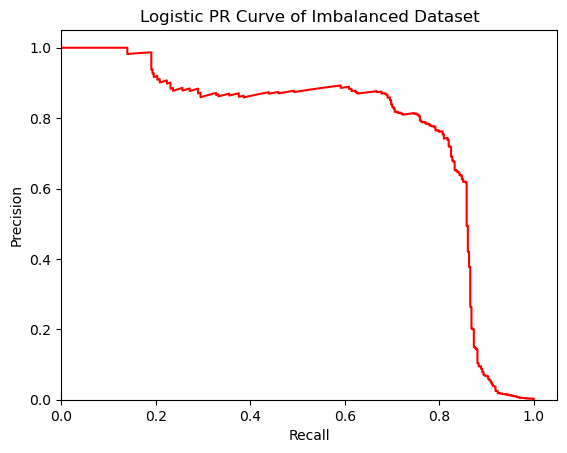

In [22]:
from sklearn.metrics import precision_recall_curve, average_precision_score

PPPrs = average_precision_score(YYY_train, YYY_train_predicted)

precision, recall, threshold = precision_recall_curve(YYY_train, YYY_train_predicted)
print(PPPrs)
plt.plot(recall, precision, color = 'r')

plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic PR Curve of Imbalanced Dataset')
plt.show()

# Undersample
To deal with the highly imbalanced dataset, we choose to undersample the dataset. The reason we choose undersample rather than oversample is to prevent from multicollinearity when performing cross-validation. Remember that cross-validation involves splitting dataset into subsets. Oversample may cause some overlaps among $k$ subsets.

The undersample method we choose is simple. There are total 492 fraud instances in the dataset, therefore we randomly choose 492 nonfraud instances from the dataset. The undersample contains 984 total instances, with 50% fraud and 50% nonfraud. This dataset in now balanced.

In [23]:
df_fraud = Scaled_df.loc[df['Class'] == 1]
df_nofraud = Scaled_df.loc[df['Class'] == 0]
fraud_number = (df['Class'] == 1).sum()
print(fraud_number)
df_nofraud_shuffle = df_nofraud.sample(frac=1, random_state = 77)[:fraud_number]
df_balanced = pd.concat([df_fraud, df_nofraud_shuffle], axis = 0).sample(frac = 1)
print(df_balanced.head())
print((df_balanced['Class'] == 1).sum()/len(df_balanced))

492
        Scaled_Time  Scaled_V1  Scaled_V2  Scaled_V3  Scaled_V4  Scaled_V5  \
154587     0.204678 -12.644441  15.262153 -14.107084   7.385314 -13.766759   
124176    -0.087994  -0.167456   0.976856  -0.518059   1.264439   1.618853   
175758     0.443896   0.858997  -0.305056  -1.432534   0.244231   1.967697   
188287     0.507666   0.703208  -0.655155  -0.440672   0.406976  -0.477821   
14457     -0.694099  -0.410821   0.731296   0.364947  -1.115791   0.335490   

        Scaled_V6  Scaled_V7  Scaled_V8  Scaled_V9  ...  Scaled_V21  \
154587   5.433459 -36.946605 -72.782456 -10.790391  ...  -51.653145   
124176  -0.230869   0.398029   0.117712  -0.390993  ...   -0.683298   
175758   3.414403  -0.417758   1.520972   0.463106  ...    0.513660   
188287  -0.301600   0.004746  -0.396181   1.078526  ...   -0.524263   
14457    0.138288   0.494132  -0.088375   0.523982  ...   -0.579679   

        Scaled_V22  Scaled_V23  Scaled_V24  Scaled_V25  Scaled_V26  \
154587    7.802010   15.898185

## Undersample Correlation Matrix
We now check the correlation matrix in this undersample. The correlations are not closed to 0 anymore. Comparing the heatmap of correlation matrix of this undersample to that of the original dataset, we see that the uncorrelation issue occurs previously indded comes from the imbalance. 

In [24]:
balanced_corr_matrix = df_balanced.corr()
print(balanced_corr_matrix)

               Scaled_Time  Scaled_V1  Scaled_V2  Scaled_V3  Scaled_V4  \
Scaled_Time       1.000000   0.243404  -0.214366   0.153430  -0.207140   
Scaled_V1         0.243404   1.000000  -0.825828   0.886105  -0.611059   
Scaled_V2        -0.214366  -0.825828   1.000000  -0.867294   0.683218   
Scaled_V3         0.153430   0.886105  -0.867294   1.000000  -0.763958   
Scaled_V4        -0.207140  -0.611059   0.683218  -0.763958   1.000000   
Scaled_V5         0.287176   0.869078  -0.803586   0.855917  -0.586058   
Scaled_V6         0.147704   0.336132  -0.287175   0.473017  -0.436453   
Scaled_V7         0.221448   0.890403  -0.853502   0.890316  -0.710924   
Scaled_V8        -0.143445  -0.096947  -0.009253  -0.184913   0.107688   
Scaled_V9         0.145434   0.662117  -0.696791   0.767511  -0.802081   
Scaled_V10        0.228551   0.741361  -0.768024   0.852768  -0.787637   
Scaled_V11       -0.321904  -0.523532   0.611992  -0.709172   0.787555   
Scaled_V12        0.276963   0.590568 

<Axes: >

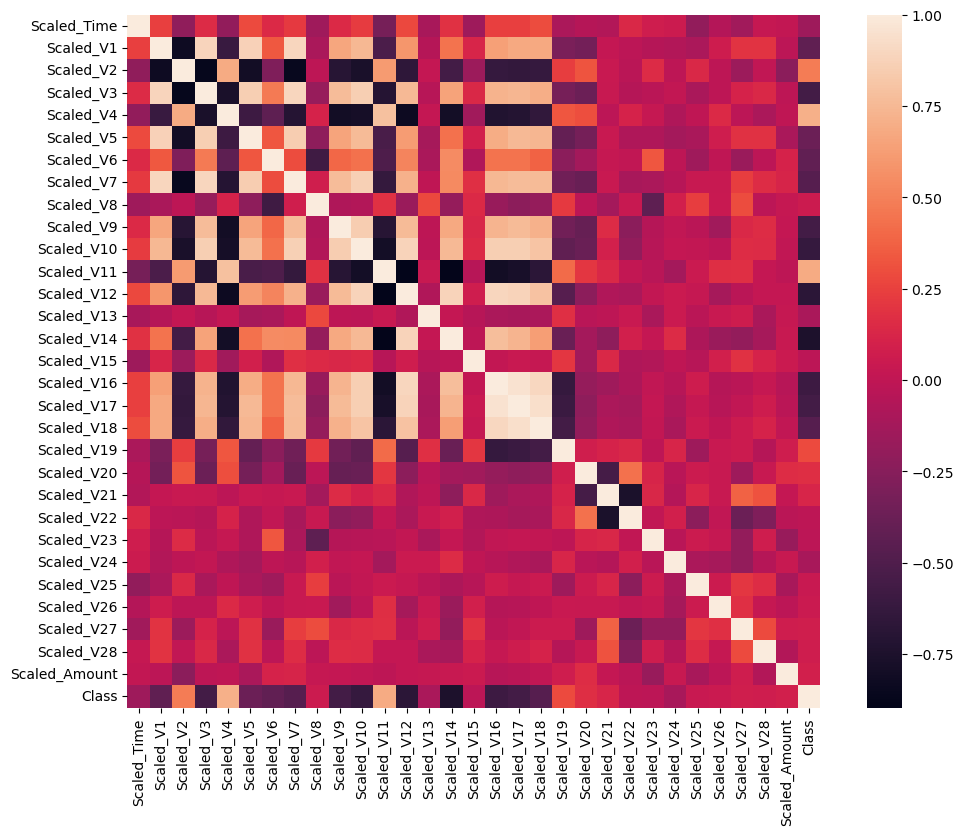

In [25]:
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(balanced_corr_matrix, square = True)

According to the correlation matrix of the balanced undersample, we can find 4 most positively correlated variables and 4 most negatively correlated variables to the dependent variable **Class**. They are listed below.
- Posivitely correlated variables: **V4**, **V11**, **V2**, and **V19**
- Negatively correlated variables: **V14**, **V12**, **V10**, and **V16**

In [26]:
corr_to_class = balanced_corr_matrix['Class'].tolist()
indices = balanced_corr_matrix.columns.tolist()
print(corr_to_class)
positive_corr_indices = np.argsort(corr_to_class)[-5:-1]
negative_corr_indices = np.argsort(corr_to_class)[0:4]

positive_corr_to_class = []
negative_corr_to_class = []

for i in range(4):
    positive_corr_to_class.append([indices[positive_corr_indices[3-i]], corr_to_class[positive_corr_indices[3-i]]])
    negative_corr_to_class.append([indices[negative_corr_indices[i]], corr_to_class[negative_corr_indices[i]]])

print(positive_corr_to_class)
print(negative_corr_to_class)

[-0.14917610495278788, -0.42259786933678567, 0.4774081712266339, -0.5586283349715662, 0.7053956696494598, -0.3731918652269987, -0.41767966611394075, -0.46801862534781474, 0.05838988337007051, -0.5594736538742456, -0.6230343482084282, 0.6858674092956021, -0.6811458437692445, -0.09724785725065131, -0.7492821546450379, -0.021592649911246303, -0.5894735281429059, -0.557683284387473, -0.4686242557637735, 0.2868410756033365, 0.16965337660206606, 0.12234220086330393, -0.007980122377670977, -0.02077748858483996, -0.10503068922657842, 0.0369126918711741, 0.04725786522062164, 0.07611282840828583, 0.0722689775392383, 0.08836676372587256, 1.0]
[['Scaled_V4', 0.7053956696494598], ['Scaled_V11', 0.6858674092956021], ['Scaled_V2', 0.4774081712266339], ['Scaled_V19', 0.2868410756033365]]
[['Scaled_V14', -0.7492821546450379], ['Scaled_V12', -0.6811458437692445], ['Scaled_V10', -0.6230343482084282], ['Scaled_V16', -0.5894735281429059]]


We also see there might be multicollinearity issue, because the correlation among **V16**, **V17**, and **V18** are close to 1. We may just drop two of these variables to avoid this issue, but that will also cause information loss. Therefore, we will keep them for now, but pay much attention to the predicted coefficients of these variables as they may be inefficient.

In [27]:
balanced_corr_matrix = balanced_corr_matrix.replace(1,0)
length = len(balanced_corr_matrix.columns)
level = 0.9
multicollinearity = []
for i in range(length):
    for j in range(i):
        if abs(balanced_corr_matrix.iloc[i, j]) > level:
            multicollinearity.append([indices[i], indices[j], balanced_corr_matrix.iloc[i, j]])

print(multicollinearity)

[['Scaled_V17', 'Scaled_V16', 0.9513166431428215], ['Scaled_V18', 'Scaled_V16', 0.9032339795196962], ['Scaled_V18', 'Scaled_V17', 0.9376940693807152]]


## Removing Outliers
Outliers are datapoints that deviate significantly from the majority of the data. They can be problematic. The outliers may lead to inefficient estimated parameters that are heavily influenced by extreme datapoints. Such inefficient parameters will make the model less robust and cannot generalize to new data. The outliers will also cause heteroskedasticity (although logistic regression does not assume homoskedasticity) and cause overfitting in the model. 

We therefore want to remove the outliers of those variables that are highly correlated to our dependent variable **Class**. The reason we don't remove the outliers of all variables is that we have a undersample including only 984 instances. Romoving all the outliers will cause us to lose too much information or degrees of freedom. 

We could roughly have the idea of the outliers by plotting the boxplots of the highly correlated variables to **Class**. In a boxplot, the central rectangular box in the middle is the interquartile range (IQR) of the data. The upper bound and the lower bound of this rectangle are the first quartile (Q1) and the third quartile (Q3) of the data. The middle line is the second quartile (Q2), also known as the median of the data. The whiskers extend from the middel rectangular box to a minimum and a maximum value. Usually, the maximum value is calculated as Q3 + 1.5IQR and the minimum value is calculated as Q1 - 1.5IQR. All datapoints beyond these limits are outliers, represented by dots in the plot. By plotting the boxplots, we can visualize the outliers.

[['Scaled_V4', 0.7053956696494598], ['Scaled_V11', 0.6858674092956021], ['Scaled_V2', 0.4774081712266339], ['Scaled_V19', 0.2868410756033365]]


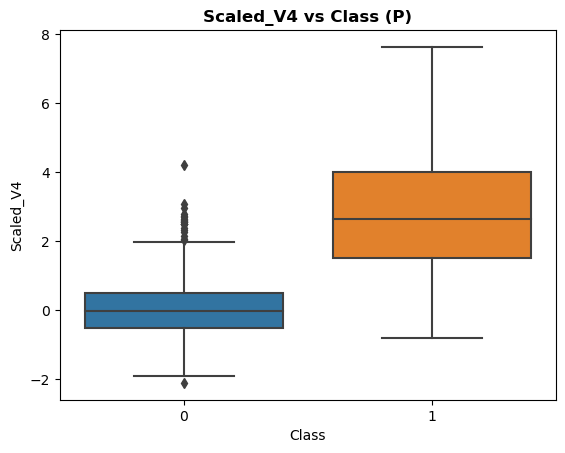

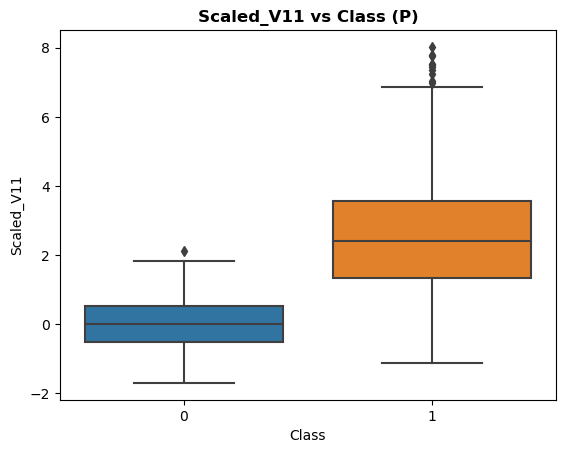

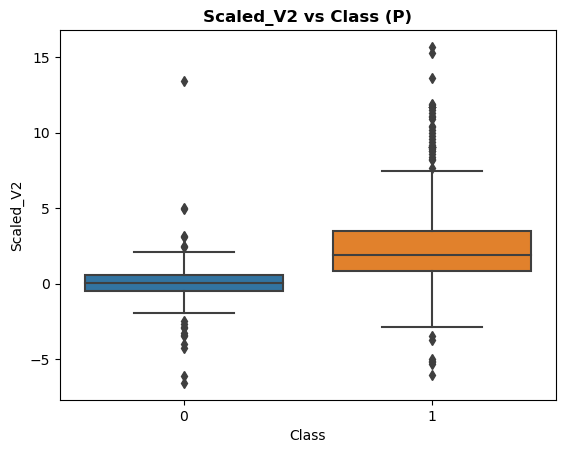

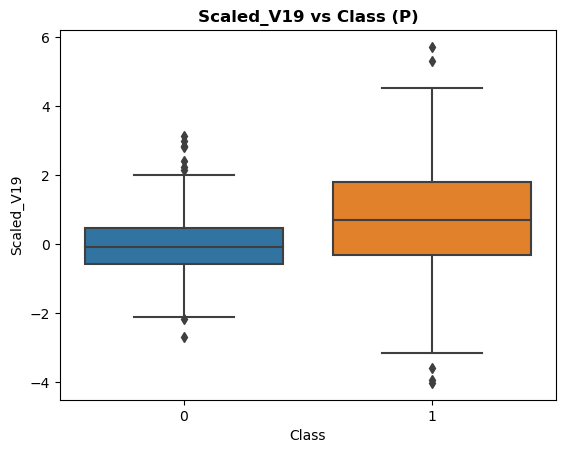

In [59]:
print(positive_corr_to_class)
for i in range(4):
    f, ax = plt.subplots()
    sns.boxplot(x = 'Class', y = positive_corr_to_class[i][0], data = df_balanced, whis = 1.5)
    ax.set_title(positive_corr_to_class[i][0]+ ' vs Class' + ' (P)', fontweight = 'bold')
    plt.show()

[['Scaled_V14', -0.7492821546450379], ['Scaled_V12', -0.6811458437692445], ['Scaled_V10', -0.6230343482084282], ['Scaled_V16', -0.5894735281429059]]


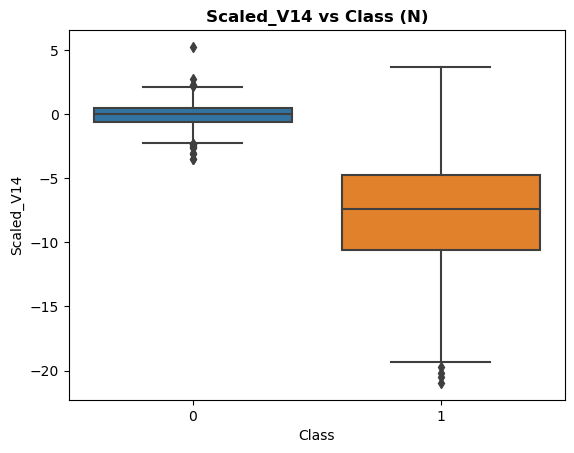

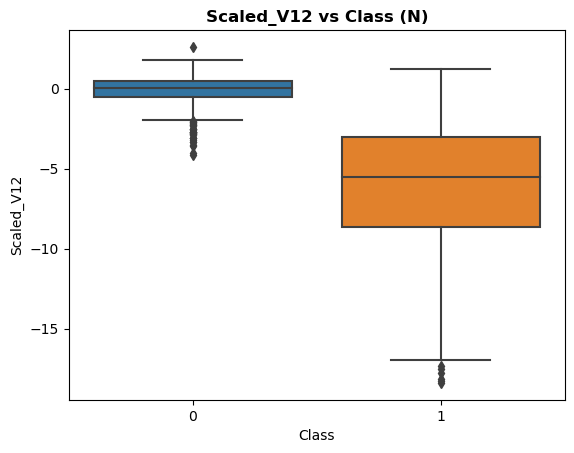

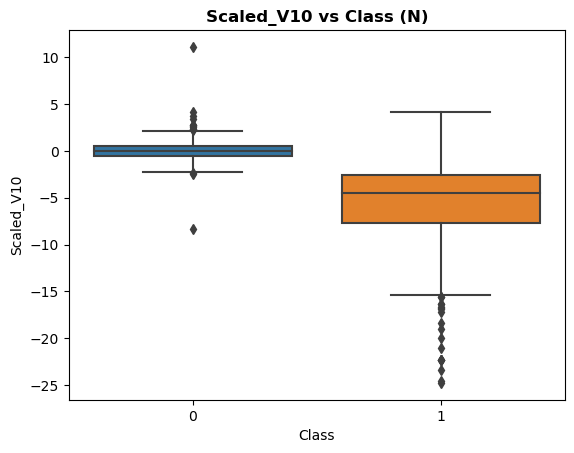

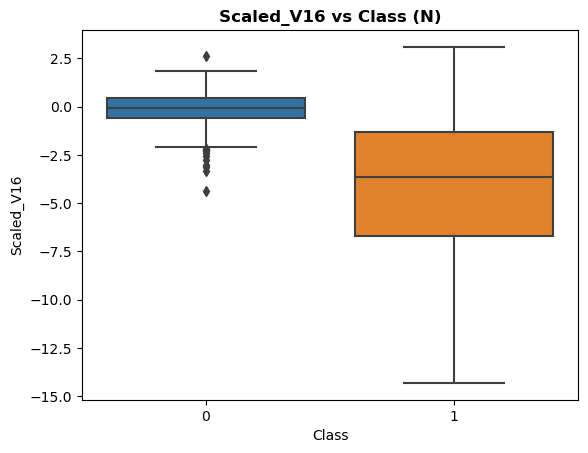

In [29]:
print(negative_corr_to_class)
for i in range(4):
    f, ax = plt.subplots()
    sns.boxplot(x = 'Class', y = negative_corr_to_class[i][0], data = df_balanced)
    ax.set_title(negative_corr_to_class[i][0]+ ' vs Class' + ' (N)', fontweight = 'bold')
    plt.show()

V10, V11, V12, V14 are highly correlated to Class. We would like to remove some outliers to improve the accuracy. We don't do it on V2, V16, V19, V20, becaude that would lose a lot of information or degrees of freedom.

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4218/3949815080.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 1].values, fit = norm, ax = axes[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4218/3949815080.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mw

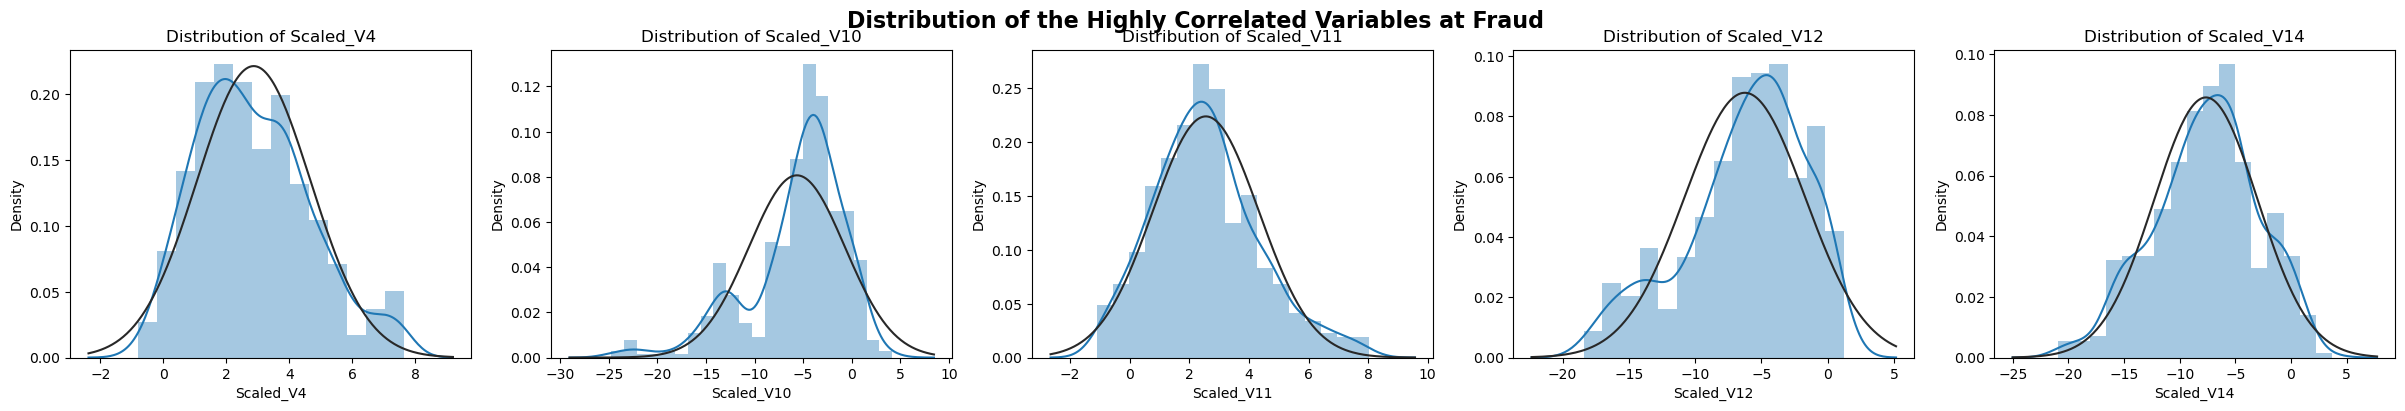

In [30]:
outlier_indices = ['Scaled_V4', 'Scaled_V10', 'Scaled_V11', 'Scaled_V12', 'Scaled_V14']
f, axes = plt.subplots(ncols = 5, figsize=(30, 4))
for i in range(5):
    sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 1].values, fit = norm, ax = axes[i])
    axes[i].set_title('Distribution of ' + outlier_indices[i])
    axes[i].set_xlabel(outlier_indices[i])
f.suptitle('Distribution of the Highly Correlated Variables at Fraud', fontsize=16, fontweight = 'bold')
plt.show()

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4218/1262102498.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 0].values, fit = norm, ax = axes[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4218/1262102498.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mw

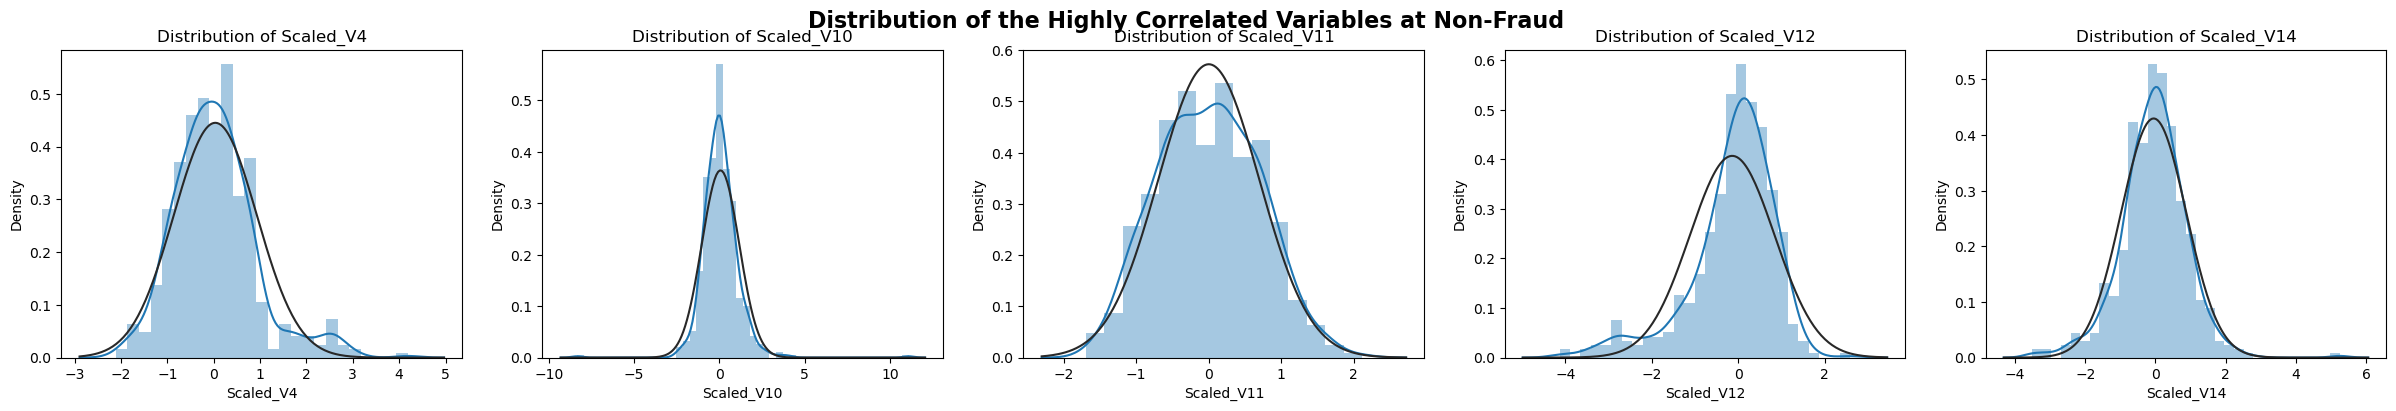

In [31]:
f, axes = plt.subplots(ncols = 5, figsize=(30, 4))
for i in range(5):
    sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 0].values, fit = norm, ax = axes[i])
    axes[i].set_title('Distribution of ' + outlier_indices[i])
    axes[i].set_xlabel(outlier_indices[i])
f.suptitle('Distribution of the Highly Correlated Variables at Non-Fraud', fontsize=16, fontweight = 'bold')
plt.show()

We can see at fraud cases, only variable V14 is close to normal distribution. However, at non-fraud cases, all 4 variables are close to norm distribution. This is intuitive because this a highly inbalanced dataset and the non-fraud cases are drawn randomly from a large population. The inbalanced dataset means that there is only certain parttern could trigger fraud and most random combination of values in the variables would be non-fraud. Therefore, in the non-fraud cases, variables will likely be normally distributed. However, in the cases of fraud, variables should display certain pattern to trigger the fraud.

We now would like to remove the extreme outliers. This is done by putting a threshold on the variables. Any values exceeding the threshold will be automatically deleted. The threshold is set by T*(75 percentile - 25 percentile), where T is a constant. We can set higher T to exclude only the most extreme outliers by losing the accuracy, or we can set lower T to exclude most outliers by losing the information or degrees of freedom.

In [32]:
fraud_data_list = []
for i in outlier_indices:
    fraud_data_list.append(df_balanced[i].loc[df_balanced['Class'] == 1].values)

percentile_25 = np.percentile(fraud_data_list, 25, axis = 1)
percentile_75 = np.percentile(fraud_data_list, 75, axis = 1)
percentile_difference = []
for i in range(5):
    percentile_difference.append(percentile_75[i] - percentile_25[i])

T = 1.5
Threshold = [T * percentile_difference[i] for i in range(5)]

Lower_threshold = [percentile_25[i] - Threshold[i] for i in range(5)]
Upper_threshold = [percentile_75[i] + Threshold[i] for i in range(5)]

print('Upper Thresholds are', Upper_threshold)
print('Lower Thresholds are', Lower_threshold)

Upper Thresholds are [7.746381853814469, 5.248404801131782, 6.883990217558612, 5.3301049003379655, 4.115960368706195]
Lower Thresholds are [-2.2428803583808445, -15.543099198090895, -1.993470546243325, -16.994706087676164, -19.43802507206913]


/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4218/3692812454.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud_data_list[i], ax = axes[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4218/3692812454.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud_da

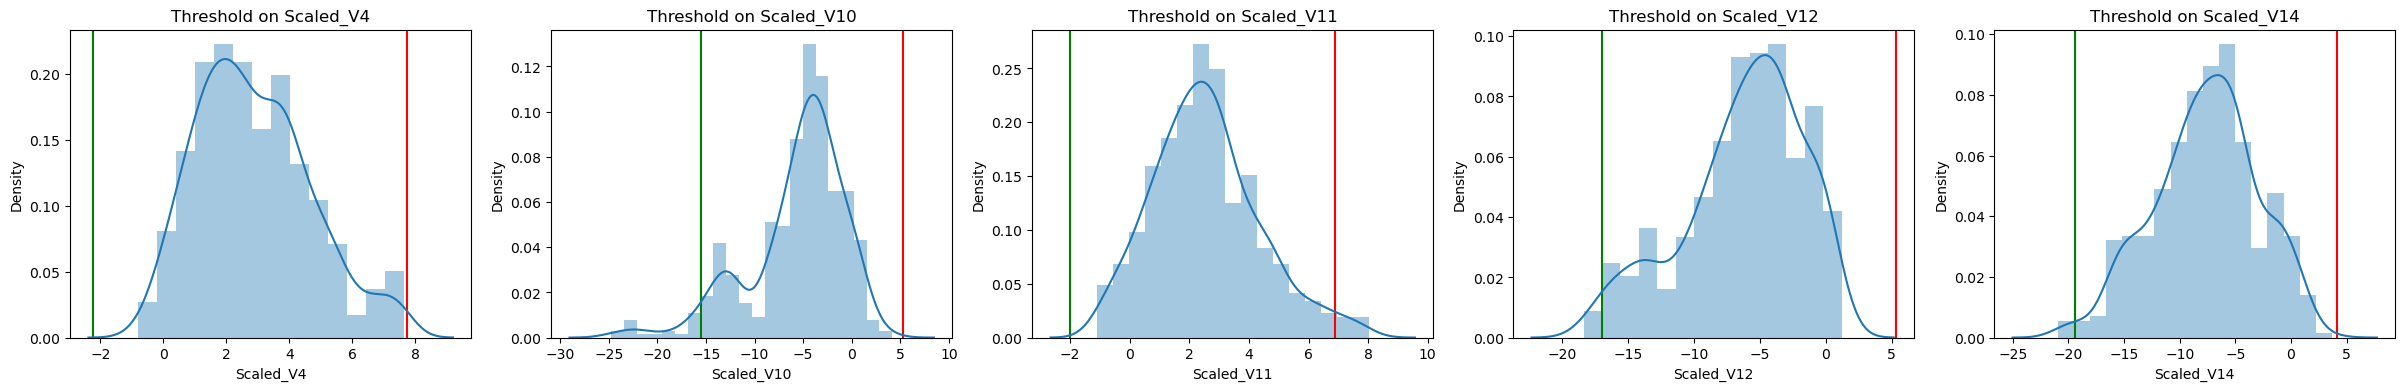

In [33]:
f, axes = plt.subplots(ncols = 5, figsize = (30,4))

for i in range(5):
    axes[i].axvline(x = Lower_threshold[i], color = 'green')
    axes[i].axvline(x = Upper_threshold[i], color = 'red')
    sns.distplot(fraud_data_list[i], ax = axes[i])
    axes[i].set_xlabel(outlier_indices[i])
    axes[i].set_title('Threshold on ' + outlier_indices[i])

plt.show()

Comparing to the boxplots of these variables, we can see that the extreme outliers of V10, V12, and V14 passes throught the lower threshold and the extreme outliers of V11 passes the upper threshold. The boxplots are consistent with the threshold plots in all the variables.

In [34]:
outlier_elements = [[outlier_indices[i]] for i in range(5)]
eliminate_indices_d = []
for i in range(5):
    for indices, values in enumerate(df_balanced[outlier_indices[i]]):
        if values < Lower_threshold[i] or values > Upper_threshold[i]:
            outlier_elements[i].append(values)
            eliminate_indices_d.append(indices)
    print(outlier_elements[i], 'count is', len(outlier_elements[i])-1)
eliminate_indices = list(set(eliminate_indices_d))
print(eliminate_indices)

['Scaled_V4'] count is 0
['Scaled_V10', -24.571979522916788, -16.336693686081375, -19.02293597741207, -22.332025751777895, -22.332025751777895, -15.637425490133717, -19.955777024117175, -15.637425490133717, 11.09173657455413, -17.232132745970617, -18.373948562862854, -21.080802176590016, -16.73495187610898, -22.332025751777895, -23.384400690377735, -16.68599929746956, -16.38513554184591, -16.83240578684039, -22.332025751777895, -24.75904943976854] count is 20
['Scaled_V11', 7.362963669658261, 7.529972327154136, 7.042212644007624, 7.790465794557108, 7.446468456283821, 7.49705117918821, 7.247093300121521, 7.757524133673799, 6.976693069856236, 8.02328074166663] count is 10
['Scaled_V12', -18.38598575572975, -17.764661133230458, -17.358345066149475, -18.139276186411564, -17.492683677993842, -18.25899179702598] count is 6
['Scaled_V14', 5.249459474799662, -20.18492764587946, -19.70189277135501, -20.542285717191973, -20.969224391850393] count is 5
[0, 132, 900, 774, 906, 525, 142, 399, 912, 

In [35]:
df_balanced_reset = df_balanced.reset_index(drop = False)
new_df_reset = df_balanced_reset.drop([df_balanced_reset.index[i] for i in eliminate_indices])
new_df = new_df_reset.set_index('index')
print(new_df.head())

        Scaled_Time  Scaled_V1  Scaled_V2  Scaled_V3  Scaled_V4  Scaled_V5  \
index                                                                        
124176    -0.087994  -0.167456   0.976856  -0.518059   1.264439   1.618853   
175758     0.443896   0.858997  -0.305056  -1.432534   0.244231   1.967697   
188287     0.507666   0.703208  -0.655155  -0.440672   0.406976  -0.477821   
14457     -0.694099  -0.410821   0.731296   0.364947  -1.115791   0.335490   
11231     -0.766104  -0.282157   0.241418   1.129891  -1.176238   0.054074   

        Scaled_V6  Scaled_V7  Scaled_V8  Scaled_V9  ...  Scaled_V21  \
index                                               ...               
124176  -0.230869   0.398029   0.117712  -0.390993  ...   -0.683298   
175758   3.414403  -0.417758   1.520972   0.463106  ...    0.513660   
188287  -0.301600   0.004746  -0.396181   1.078526  ...   -0.524263   
14457    0.138288   0.494132  -0.088375   0.523982  ...   -0.579679   
11231    0.060223   0.31497

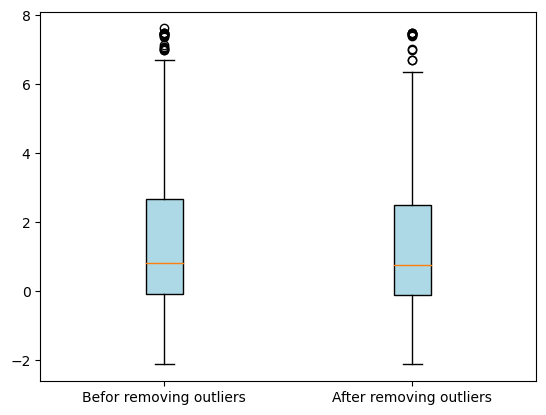

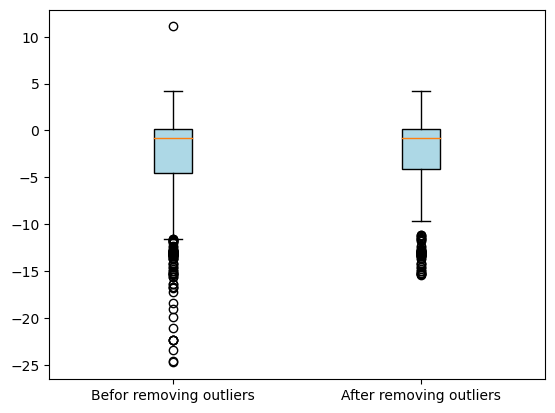

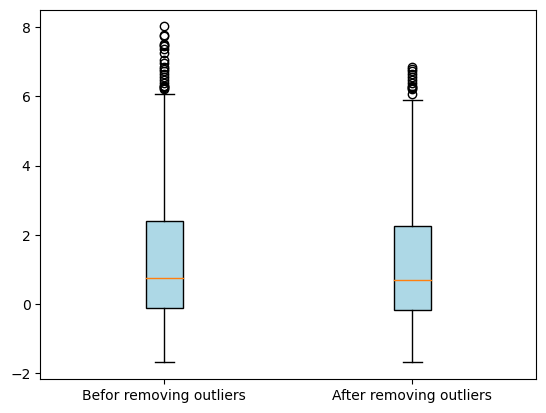

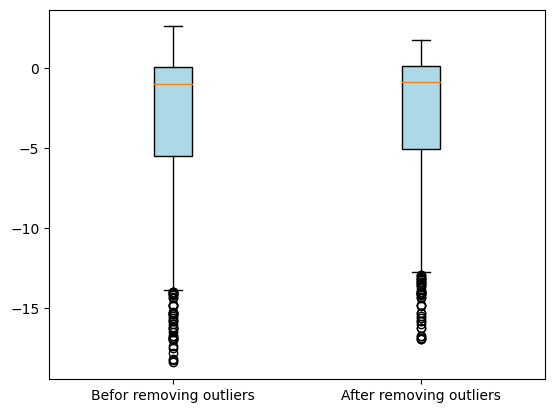

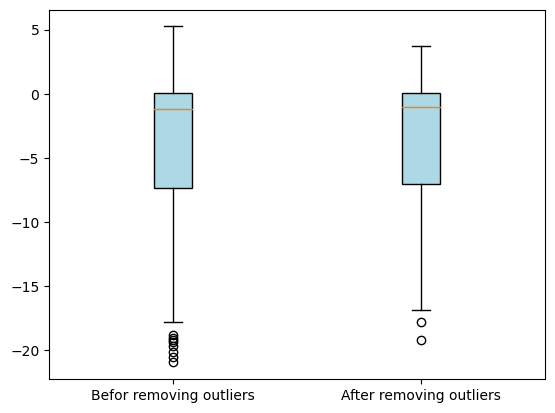

In [36]:
#f, axes = plt.subplots(ncols = 5, figsize = [30, 4])

for i in range(5):
    my_dict = {'Befor removing outliers': df_balanced[outlier_indices[i]], 'After removing outliers': new_df[outlier_indices[i]]}
    f, ax = plt.subplots()
    ax.boxplot(my_dict.values(), patch_artist = True, boxprops = dict(facecolor = "lightblue"))
    ax.set_xticklabels(my_dict.keys())
plt.show()

The boxplots after removing outliers is much shorter than before removing the outliers. The outliers are deduced significantly.

Now, logistic regression. p(x) = 1/(1+e^(-f(x)) where f(x) = b_0 + sum_1^n b_i x_i. b_i are the estimators.

In [37]:
X = new_df.drop('Class', axis = 1)
y = new_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [38]:
model_logistic = LogisticRegression(solver = 'liblinear', random_state = 7)

model_logistic.fit(X_train, y_train)

print(model_logistic.intercept_)
print(model_logistic.coef_)

[-3.46809768]
[[-6.37464168e-01  7.50501159e-02 -3.87651582e-01 -1.71166990e-01
   1.57769423e+00  1.47874888e-01 -3.91199395e-01  3.47384400e-01
  -3.91587835e-01 -6.11057270e-02 -7.60773766e-01  9.56305185e-01
  -8.72527636e-01 -5.13213956e-01 -1.09148987e+00 -7.88614037e-02
   6.64422186e-04 -5.33737747e-01 -4.24177041e-01  1.15361725e-01
  -1.45272787e-01 -2.97839828e-02  7.91571994e-01 -9.48975116e-02
  -3.17319250e-01 -2.90908972e-01 -2.10966405e-01  1.05735607e-01
   3.43929141e-02  7.59070461e-02]]


We can test the accuracy of the model by several methods. 1. We can use the cross-validation method to split the dataset into n parts. Using n-1 parts to train and 1 part to test iteratively, it will return an array of n testing scores. 2. As the 'Class' variable only takes 0 or 1, we can use Receiver Operating Characteristic Area Under the Curve (ROC AUC) score, which is to evaluate the performance of a binary classification model. As the splitted test dataset is small, we will be using the cross-validation method to predict the training dataset and obtain the predicted value for y_train. 3. We could also check the training accuracy by predicting the test dataset we splitted before. It will give us a score on the accuracy as well as the details on Positive True, Negative True, Positive False, and Negative False. 

In [39]:
cvs = cross_val_score(model_logistic, X_train, y_train, cv = 10)

roc_cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 77)
y_train_predicted = cross_val_predict(model_logistic, X_train, y_train, cv = roc_cv, method = 'predict_proba')[:, 1]
ras = roc_auc_score(y_train, y_train_predicted)

print('The cvs score of the model is', cvs.mean())
print('The ras score of the model is', ras)
print('By predicting the test data, we have an accuracy of', model_logistic.score(X_test, y_test))
print(classification_report(y_test, model_logistic.predict(X_test)))

The cvs score of the model is 0.9380526315789475
The ras score of the model is 0.9754570498372152
By predicting the test data, we have an accuracy of 0.9526315789473684
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        94
           1       0.99      0.92      0.95        96

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.96      0.95      0.95       190



This is a very good result.

Let's do gridsearch to find the best parameter in the logistic regression. Penalties are specified by L1 or L2 regularization. L1 (Lasso) tends to force the coefficients of irrelevant features to 0, while L2 (Ridge) prevents a single feature to dominate the prediction. C is the hyperparameter that controls the strength of these regularizations. Smaller C means higher strength.

In [40]:
grid_parameter_log = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.01, 0.1, 1, 10, 100] 
}

gs = GridSearchCV(estimator = model_logistic, param_grid = grid_parameter_log, cv = 10, scoring = 'accuracy')

gs.fit(X_train, y_train)

bestparameters_logistic = gs.best_params_
bestmodel_logistic = gs.best_estimator_
cvs_score_log = cross_val_score(bestmodel_logistic, X_train, y_train, cv = 10)
best_training_score_log = bestmodel_logistic.score(X_test, y_test)

print(bestparameters_logistic)
print('cvs score under this logistic regression is', cvs_score_log.mean())
print('The best training score is', best_training_score_log)

/Users/yikangli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yikangli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'C': 0.1, 'penalty': 'l2'}
cvs score under this logistic regression is 0.9433157894736842
The best training score is 0.9315789473684211


We can see by using the grid search, the cvs score increases. 

We would like to see how the logistic regression behaves when we vary the training size. This can be done by learning_curve.

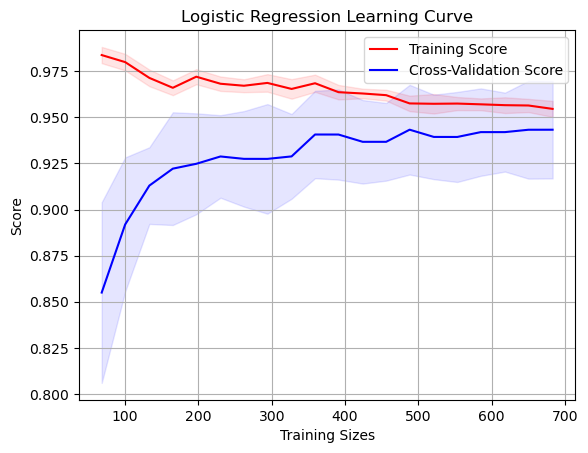

In [41]:
training_sizes = np.linspace(0.1, 1.0, 20)

training_sizes, training_score, test_score = learning_curve(
    bestmodel_logistic, X_train, y_train, cv = 10, train_sizes = training_sizes, scoring = 'accuracy'
)

training_score_mean = np.mean(training_score, axis = 1)
training_score_std = np.std(training_score, axis = 1)
test_score_mean = np.mean(test_score, axis = 1)
test_score_std = np.std(test_score, axis = 1)

plt.figure()

plt.title('Logistic Regression Learning Curve')
plt.xlabel('Training Sizes')
plt.ylabel('Score')
plt.grid()

plt.plot(training_sizes, training_score_mean, color = 'r', label = 'Training Score')
plt.plot(training_sizes, test_score_mean, color = 'b', label = 'Cross-Validation Score')

plt.fill_between(
    training_sizes, training_score_mean - training_score_std, training_score_mean + training_score_std, alpha = 0.1, color = 'r'
)
plt.fill_between(
    training_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, alpha = 0.1, color = 'b'
)


plt.legend()
plt.show()



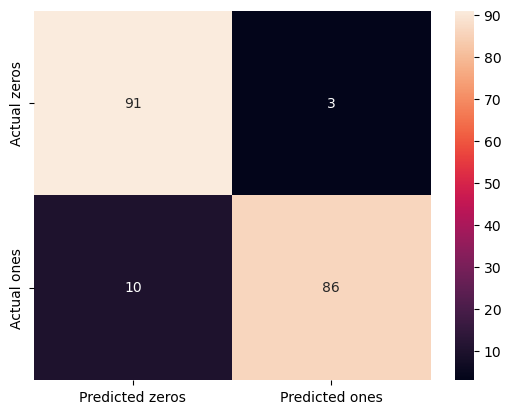

In [42]:
df_confusion_matrix = confusion_matrix(y_test, bestmodel_logistic.predict(X_test))

xlabels = ['Predicted zeros', 'Predicted ones']
ylabels = ['Actual zeros', 'Actual ones']
ax = sns.heatmap(df_confusion_matrix, annot = True, xticklabels = xlabels, yticklabels = ylabels)

plt.show()

We will plot a ROC curve

0.9768135904499541


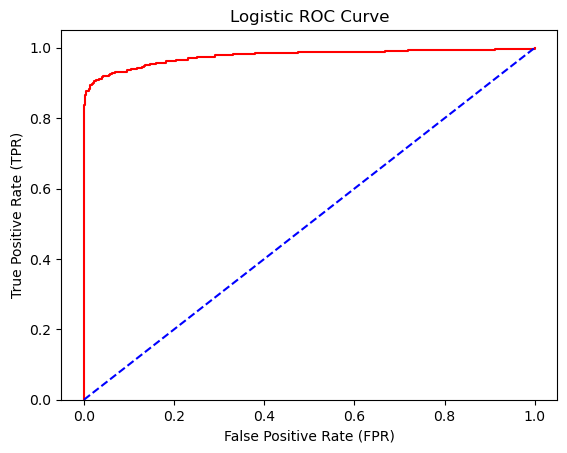

In [43]:
from sklearn.metrics import roc_curve

bestmodel_y_train_predicted = cross_val_predict(bestmodel_logistic, X_train, y_train, cv = roc_cv, method = 'predict_proba')[:, 1]
bestmodel_ras = roc_auc_score(y_train, bestmodel_y_train_predicted)
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_train, bestmodel_y_train_predicted)
print(bestmodel_ras)
plt.figure()
plt.plot(fpr_logistic, tpr_logistic, color = 'r')
plt.plot([0, 1], [0, 1], color = 'b', linestyle = '--')
plt.xlim(-0.05, 1.05)
plt.ylim(0, 1.05)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Logistic ROC Curve')

plt.show()

We can intepret this graph as following. FPR is the propotion of negative samples are incorrectly classified as positive, and TPR is the propotion of positive samples are correctly classified as positive. This plot is plotted as the threshold changes. The dashed line will represent a random classifier that has no ability to classify. Therefore, there will be an equal chance of classifing the negative sample as positive and classifing the positive sample as positive. The roc_auc score is calculated as the area under the cure. For example, a random classifier will have a score equals to the area under the dashed line, which is 0.5. In the logistic regression model we performed, the area is 0.979257869501772. The higher the score, the better the performance of the classifier is. For a perfect classification (TPR = 1, and FPR = 0), the area or the score is 1.

We could look more into this by plotting a Presicion Recall Curve (PRC). Precision is defined as True Positives/(True Positives + False Positives). Recall is defined as True Positives/(True Positives + False Negatives).

0.9819181676965189


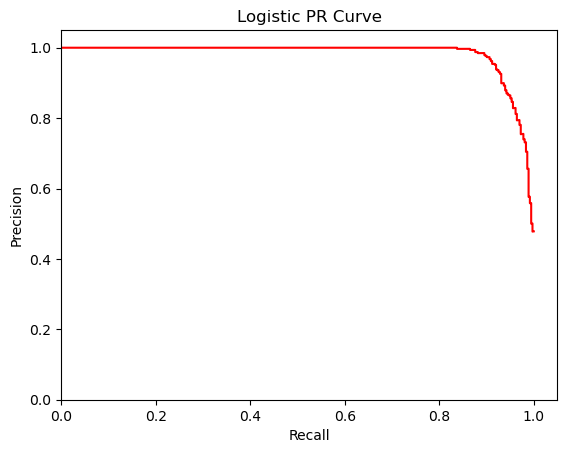

In [44]:
from sklearn.metrics import precision_recall_curve, average_precision_score

prs = average_precision_score(y_train, bestmodel_y_train_predicted)

precision, recall, _ = precision_recall_curve(y_train, bestmodel_y_train_predicted)
print(prs)
plt.plot(recall, precision, color = 'r')

plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic PR Curve')
plt.show()

Similar to the ROC, the area under the curve represents the performance of the model. As we can see, the score is much higher than we have done this on the original dataset.

Now let us see how the decision tree classifier works. Decision tree classifier works as following. It first chooses a root node that can explain the data best. The data are then been splitted according the the values or thresholds in this root attribute. The nodes are then been selected for all splitted subsets of the original data. This process is iterated until it reaches a leaf node, which represent a predicted class for the region. 

In [45]:
from sklearn.tree import DecisionTreeClassifier

model_DTC = DecisionTreeClassifier(random_state = 77)

model_DTC.fit(X_train, y_train)

y_test_predicted = model_DTC.predict(X_test)
cvs = cross_val_score(model_DTC, X_train, y_train, cv = 10)

print(model_DTC.score(X_test, y_test))
print(classification_report(y_test, y_test_predicted))
print(cvs.mean())

0.8947368421052632
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        94
           1       0.89      0.91      0.90        96

    accuracy                           0.89       190
   macro avg       0.89      0.89      0.89       190
weighted avg       0.89      0.89      0.89       190

0.8958771929824563


We can use gridsearch to find the best model for decision tree classifier. The criterion measures the quality of the split. Max_depth controls how large the tree can grow (the maximum layers of nodes cannot exceed certain value). This is to prevent overfitting. If the grows infinitely, there will definitely be a problem of overfitting. Min_samples_split set a threshold, under which a node will be splitted anymore. This is also to prevent overfitting. Min_sample_leaf controls the minimum samples in a leaf. This is to prevent the tree growing too large.

In [46]:
grid_parameters_DTC = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 10, 20, 30, 40],
    'min_samples_split' : [2, 4, 6, 8, 10],
    'min_samples_leaf' : [1, 2, 4]
}

gs = GridSearchCV(estimator = model_DTC, param_grid = grid_parameters_DTC, cv = 10, n_jobs = -1)

gs.fit(X_train, y_train)

bestparameters_DTC = gs.best_params_

bestmodel_DTC = gs.best_estimator_

best_cvs_DTC = cross_val_score(bestmodel_DTC, X_train, y_train, cv = 10)
best_training_score_DTC = bestmodel_DTC.score(X_test, y_test)
print(bestparameters_DTC)
print(best_training_score_DTC)
print(best_cvs_DTC.mean())

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8947368421052632
0.9143333333333332


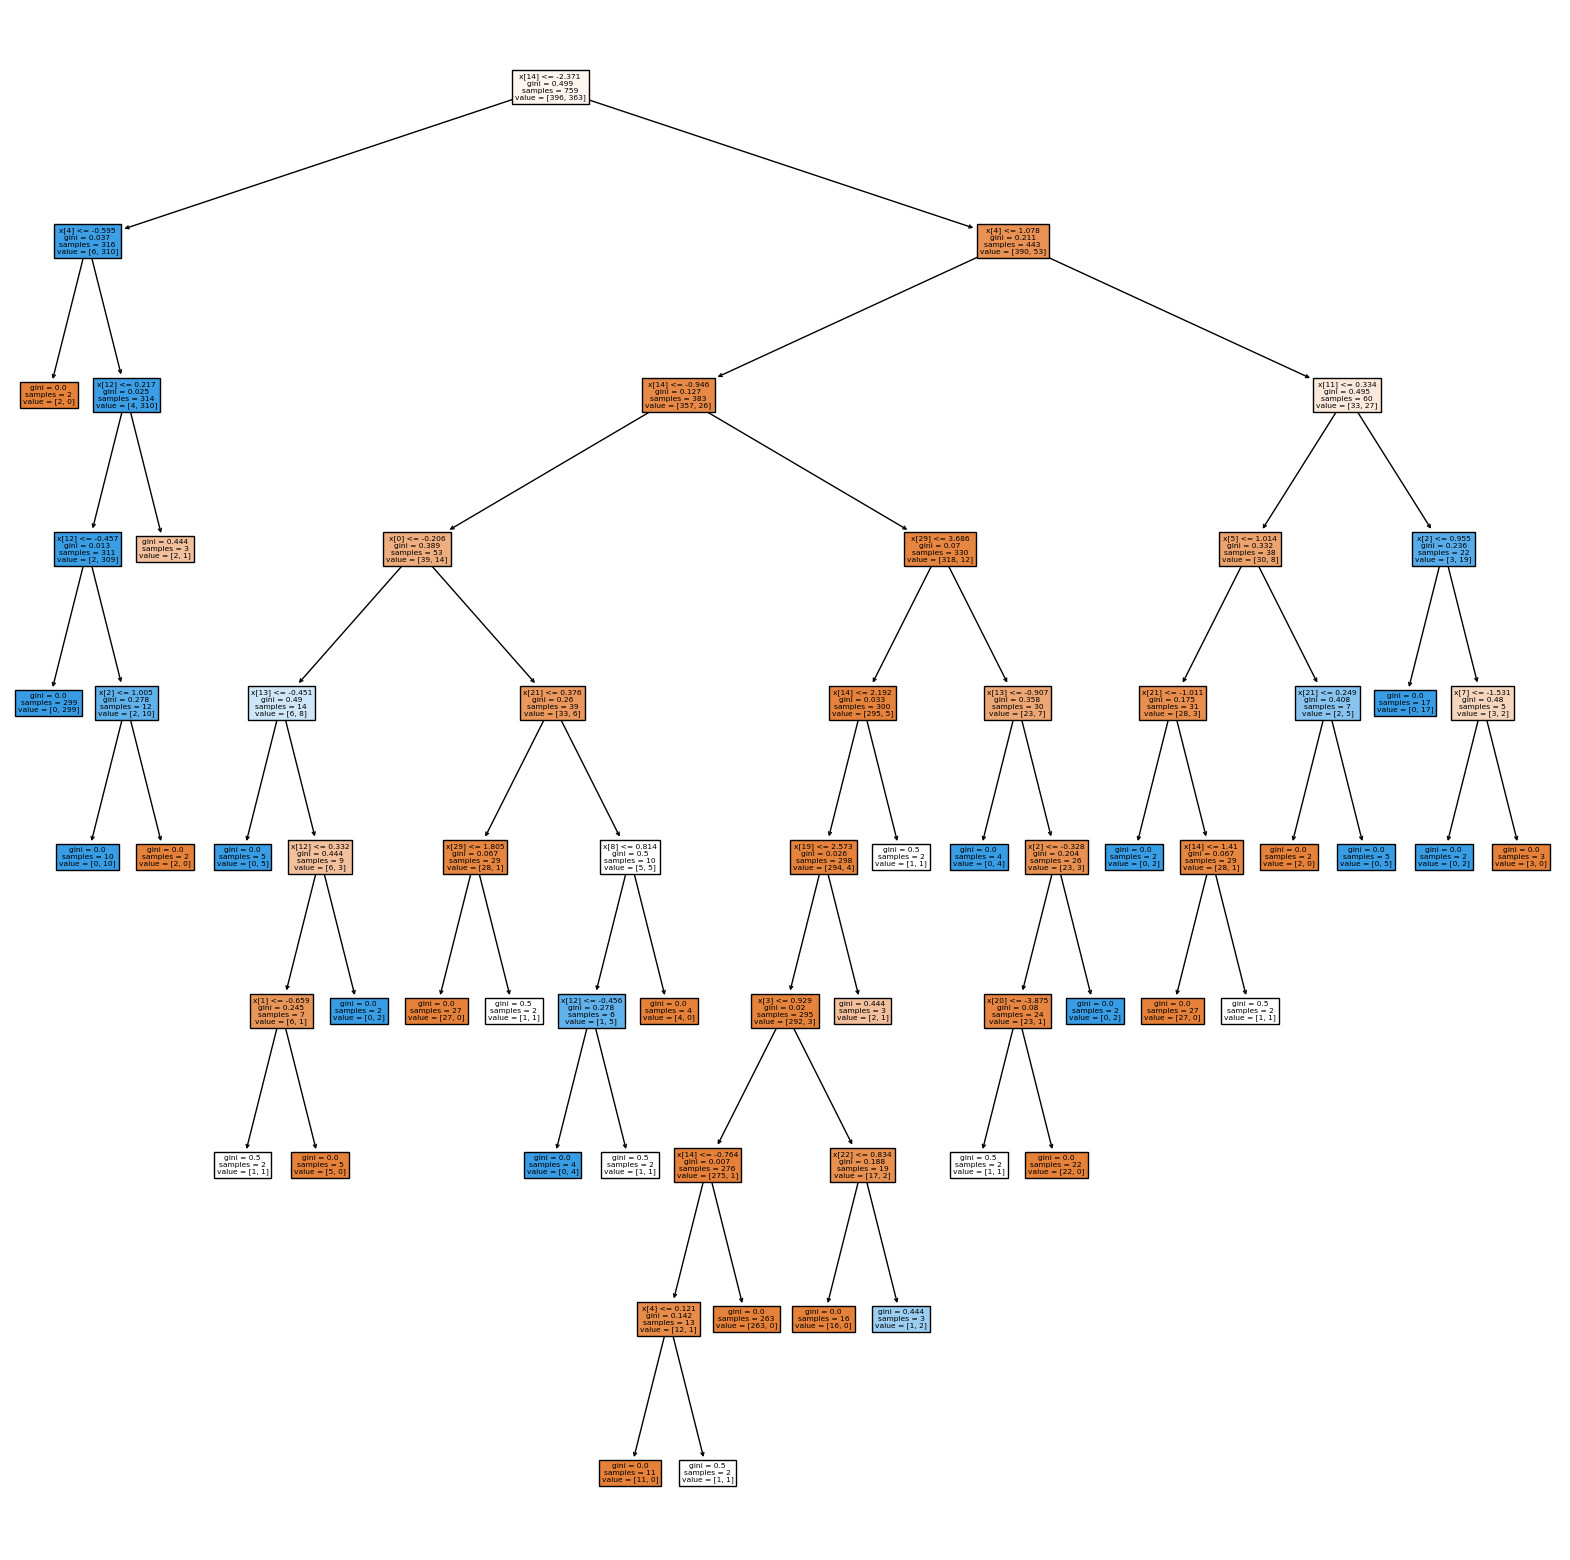

In [47]:
from sklearn import tree

plt.figure(figsize = (20, 20))
tree.plot_tree(bestmodel_DTC, filled = True)

plt.show()

In [48]:
Importance = bestmodel_DTC.feature_importances_
print(Importance)

ranked = sorted([(x, i) for (i, x) in enumerate(Importance)], reverse = True)

Highest_Importances = []

for x, i in ranked:
    Highest_Importances.append([x, i])
    if len(Highest_Importances) ==3:
        break

print('Most important variable is', Highest_Importances[0][1], 'Coefficient is', Highest_Importances[0][0])
print('Second most important variable is', Highest_Importances[1][1], 'Coefficient is', Highest_Importances[1][0])
print('Third most important variable is', Highest_Importances[2][1], 'Coefficient is', Highest_Importances[2][0])  

[0.00976877 0.00194214 0.02584727 0.00099864 0.05402248 0.01184146
 0.         0.00652559 0.00906333 0.         0.         0.03231964
 0.01681375 0.02252087 0.76254136 0.         0.         0.
 0.         0.0016866  0.00249241 0.02601612 0.00610582 0.
 0.         0.         0.         0.         0.         0.00949376]
Most important variable is 14 Coefficient is 0.7625413585726117
Second most important variable is 4 Coefficient is 0.054022475878936806
Third most important variable is 11 Coefficient is 0.032319643696501726


We can see that the Decision Tree Classifier gives the top three important features are V14, V4, and V8. While in the correlation matrix, we have the most correlated variables to 'Class' are V14, V4, V11, and V12. The Decision Tree Classifier shows some consistency with the rough result we interpreted previously.

We could also see that V14 is the root node, which is much more important than other features (coefficient is 0.7994695224791236).

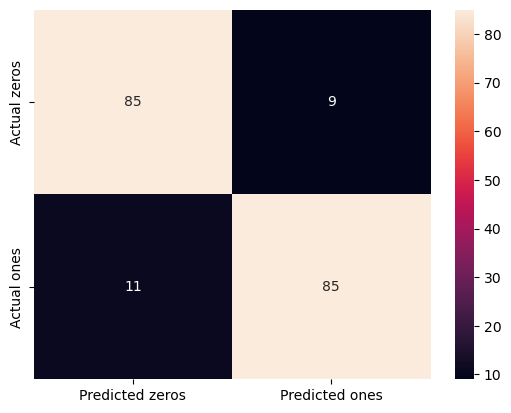

In [49]:
df_confusion_matrix_DTC = confusion_matrix(y_test, bestmodel_DTC.predict(X_test))

xlabels = ['Predicted zeros', 'Predicted ones']
ylabels = ['Actual zeros', 'Actual ones']
ax = sns.heatmap(df_confusion_matrix_DTC, annot = True, xticklabels = xlabels, yticklabels = ylabels)

plt.show()

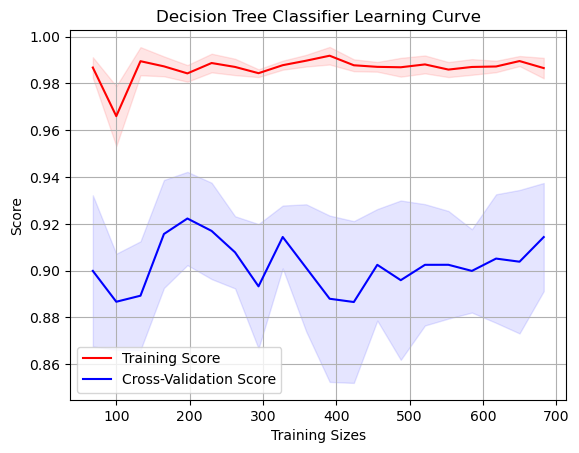

In [50]:
training_sizes = np.linspace(0.1, 1.0, 20)

training_sizes, training_score, test_score = learning_curve(
    bestmodel_DTC, X_train, y_train, cv = 10, train_sizes = training_sizes, scoring = 'accuracy'
)

training_score_mean = np.mean(training_score, axis = 1)
training_score_std = np.std(training_score, axis = 1)
test_score_mean = np.mean(test_score, axis = 1)
test_score_std = np.std(test_score, axis = 1)

plt.figure()

plt.title('Decision Tree Classifier Learning Curve')
plt.xlabel('Training Sizes')
plt.ylabel('Score')
plt.grid()

plt.plot(training_sizes, training_score_mean, color = 'r', label = 'Training Score')
plt.plot(training_sizes, test_score_mean, color = 'b', label = 'Cross-Validation Score')

plt.fill_between(
    training_sizes, training_score_mean - training_score_std, training_score_mean + training_score_std, alpha = 0.1, color = 'r'
)
plt.fill_between(
    training_sizes, test_score_mean - test_score_std, test_score_mean + test_score_std, alpha = 0.1, color = 'b'
)


plt.legend()
plt.show()

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4218/1262102498.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 0].values, fit = norm, ax = axes[i])
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_4218/1262102498.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mw

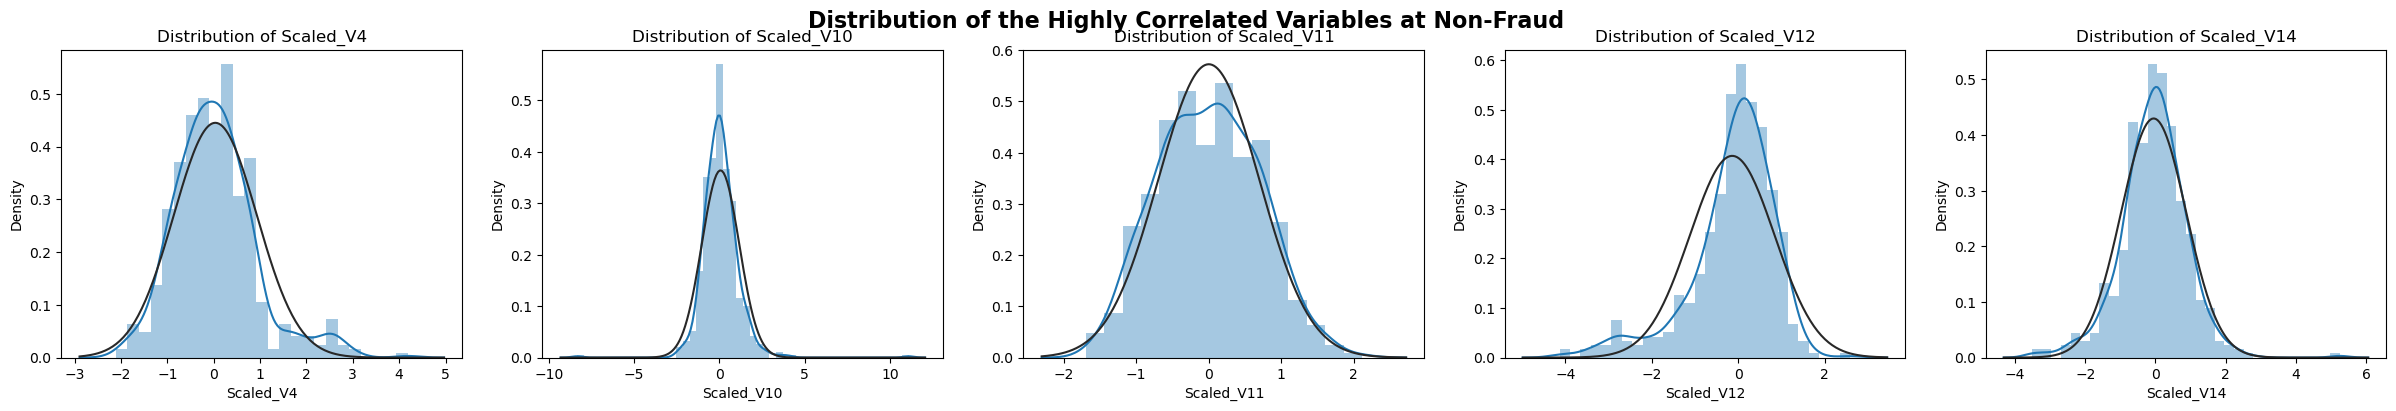

In [51]:
f, axes = plt.subplots(ncols = 5, figsize=(30, 4))
for i in range(5):
    sns.distplot(df_balanced[outlier_indices[i]].loc[df_balanced['Class'] == 0].values, fit = norm, ax = axes[i])
    axes[i].set_title('Distribution of ' + outlier_indices[i])
    axes[i].set_xlabel(outlier_indices[i])
f.suptitle('Distribution of the Highly Correlated Variables at Non-Fraud', fontsize=16, fontweight = 'bold')
plt.show()

0.9207049837215127
0.889690729328023


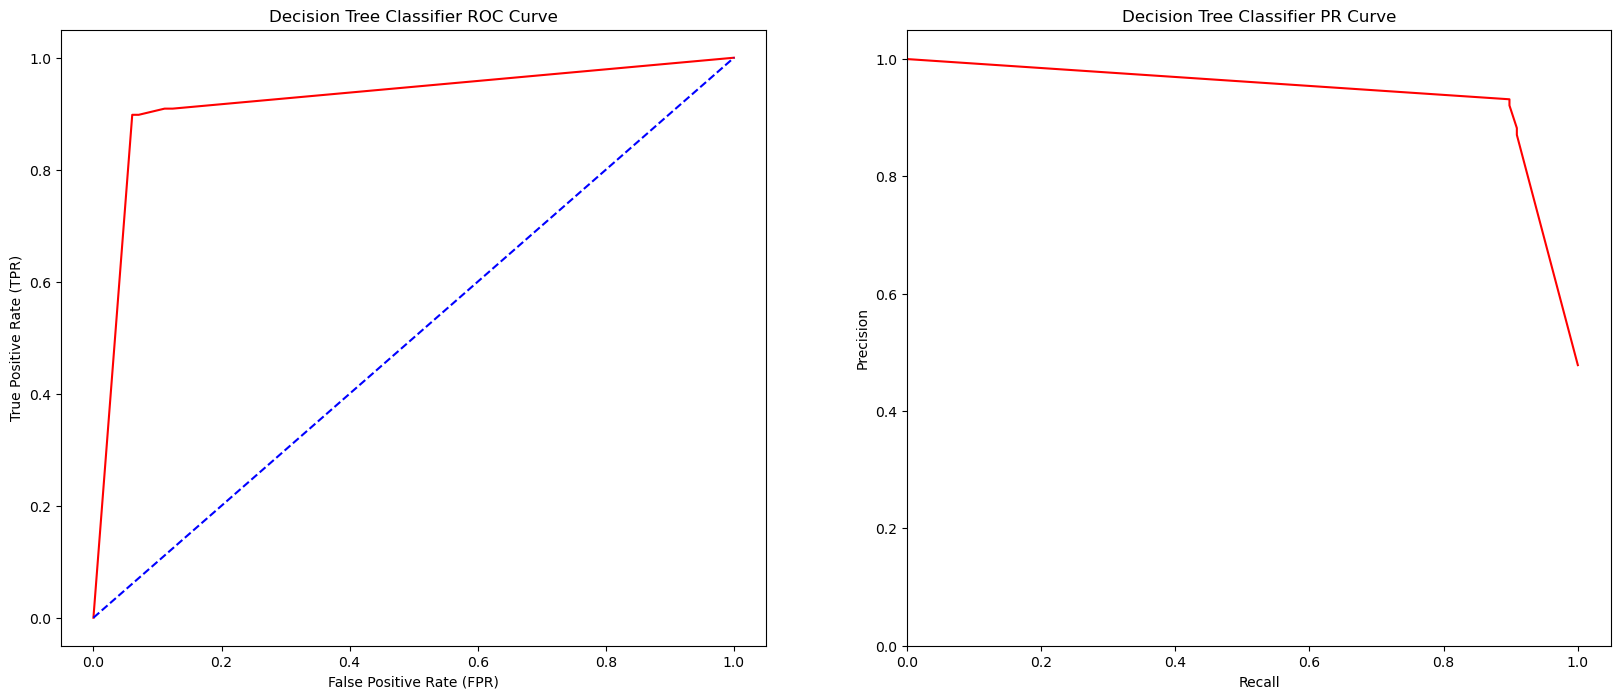

In [52]:
bestmodel_DTC_y_train_predicted = cross_val_predict(bestmodel_DTC, X_train, y_train, cv = 10, method = 'predict_proba')[:, 1]
bestmodel_ras_DTC = roc_auc_score(y_train, bestmodel_DTC_y_train_predicted)
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_train, bestmodel_DTC_y_train_predicted)
prs_DTC = average_precision_score(y_train, bestmodel_DTC_y_train_predicted)
precision, recall, _ = precision_recall_curve(y_train, bestmodel_DTC_y_train_predicted)
print(bestmodel_ras_DTC)
print(prs_DTC)
f, axes = plt.subplots(ncols=2, figsize = (20, 8))

axes[0].plot(fpr_logistic, tpr_logistic, color = 'r')
axes[0].plot([0, 1], [0, 1], color = 'b', linestyle = '--')
plt.xlim(-0.05, 1.05)
plt.ylim(0, 1.05)
axes[0].set_xlabel('False Positive Rate (FPR)')
axes[0].set_ylabel('True Positive Rate (TPR)')
axes[0].set_title('Decision Tree Classifier ROC Curve')


axes[1].plot(recall, precision, color = 'r')
plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Decision Tree Classifier PR Curve')

plt.show()